## Social Media and Network Analytics
#### Anjana Karathat Rajeev

In [249]:
%load_ext autoreload
%autoreload 1
%aimport redditClient
%aimport RedditProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
import json
import pandas as pd
with open('singularity.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the loaded dictionary
df = pd.DataFrame.from_dict(data['submissions'])

df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments
0,Official r/singularity Discord server link,DnDNecromantic,66,0,,1.690971e+09,0.94,[]
1,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,"[{'author': 'agorathird', 'score': 189, 'body'..."
2,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,"[{'author': 'Pimmelpansen', 'score': 130, 'bod..."
3,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"[{'author': 'czk_21', 'score': 8, 'body': 'did..."
4,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,"[{'author': 'BeginningInfluence55', 'score': 1..."


### Summary Statistics

Text(0.5, 1.0, 'Distribution of score')

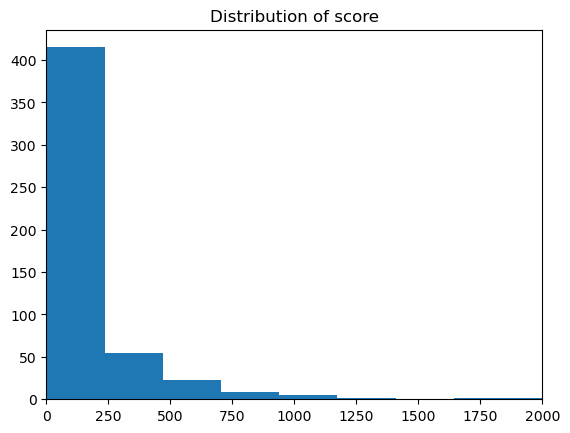

In [251]:
import matplotlib.pyplot as plt
plt.hist(df['score'])
plt.xlim(0, 2000)
plt.title('Distribution of score')

Text(0.5, 1.0, 'Distribution of Upvote ratio')

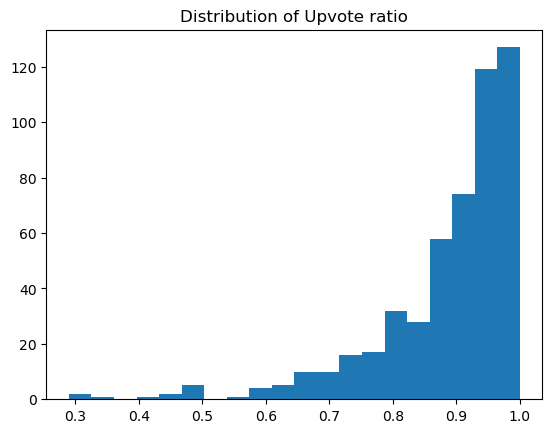

In [252]:
plt.hist(df['upvoteratio'],bins=20)
#plt.xlim(0, 200)
plt.title('Distribution of Upvote ratio')

In [253]:
idx = df['upvoteratio'].idxmax()
df.loc[idx]

title                 Octopus: Embodied Vision-Language Programmer f...
author                                                  Singularian2501
score                                                                36
Number of comments                                                    2
self text             Paper: [https://arxiv.org/abs/2310.08588](http...
timestamp                                                  1697315578.0
upvoteratio                                                         1.0
comments              [{'author': 'Akimbo333', 'score': 1, 'body': '...
Name: 46, dtype: object

In [254]:
print("Title:",df.loc[idx]['title'],"\nSelf Text:",df.loc[idx]['self text'],"\nUpvote Ratio:", df.loc[idx]['upvoteratio'])

Title: Octopus: Embodied Vision-Language Programmer from Environmental Feedback - Nanyang Technological University 2023 - Continually refines its understanding and execution, demonstrating impressive adaptability! 
Self Text: Paper: [https://arxiv.org/abs/2310.08588](https://arxiv.org/abs/2310.08588) 

Blog: [https://choiszt.github.io/Octopus/](https://choiszt.github.io/Octopus/) 

Github: [https://github.com/dongyh20/Octopus](https://github.com/dongyh20/Octopus) 

Youtube short: [https://www.youtube.com/watch?v=lHbTvB0yIP4](https://www.youtube.com/watch?v=lHbTvB0yIP4) 

Abstract:

>Large vision-language models (VLMs) have achieved substantial progress in **multimodal perception and reasoning**. Furthermore, when seamlessly integrated into an **embodied agent**, it signifies a crucial stride towards the **creation of autonomous and context-aware systems capable of formulating plans and executing commands with precision**. In this paper, we introduce Octopus, a novel VLM designed to pro

In [255]:
idx = df['score'].idxmax()
df.loc[idx]

title                                        Something to think about 🤔
author                                                         Pro_RazE
score                                                              2348
Number of comments                                                  452
self text                                                              
timestamp                                                  1696163188.0
upvoteratio                                                        0.93
comments              [{'author': 'apex_flux_34', 'score': 430, 'bod...
Name: 208, dtype: object

In [256]:
print("Title:",df.loc[idx]['title'],"\nSelf Text:",df.loc[idx]['self text'],"\nUpvote Ratio:", df.loc[idx]['upvoteratio'])

Title: Something to think about 🤔 
Self Text:  
Upvote Ratio: 0.93


In [257]:
idx = df['Number of comments'].idxmax()
df.loc[idx]

title                                          Taking Dall-E 3 requests
author                                                         Derpgeek
score                                                              1070
Number of comments                                                 1243
self text             If you have any requests I’ll try to get to yo...
timestamp                                                  1695575720.0
upvoteratio                                                        0.91
comments              [{'author': 'yaosio', 'score': 69, 'body': 'A ...
Name: 328, dtype: object

In [258]:
df['comments'] = df['comments'].apply(lambda comments: [comment['body'] for comment in comments])
df['comments'] = df['comments'].str[0]

In [259]:
df = df.dropna()

In [260]:
df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments
1,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...
2,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.
3,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s..."
4,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...
5,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh..."


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1 to 511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               503 non-null    object 
 1   author              503 non-null    object 
 2   score               503 non-null    int64  
 3   Number of comments  503 non-null    int64  
 4   self text           503 non-null    object 
 5   timestamp           503 non-null    float64
 6   upvoteratio         503 non-null    float64
 7   comments            503 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 35.4+ KB


#### Removing special characters

In [262]:
import re
df["Title"] = df["title"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df["Self Text"] = df["self text"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df["Top Comments"] = df["comments"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

#### Converting to lowercase and tokenizing the title and the content text

In [263]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Convert text to lowercase
df["Title"] = df["Title"].str.lower()
df["Self Text"] = df["Self Text"].str.lower()
df["Top Comments"] = df["comments"].str.lower()

# Tokenize text
df["tokenized_title"] = df["Title"].apply(word_tokenize)
df["tokenized_text"] = df["Self Text"].apply(word_tokenize)
df["tokenized_comments"] = df["Top Comments"].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Removing stopwords

In [264]:
lPunct = ['.', ',', ';', ':', '!', '?', '"', "'", '-']
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']

In [265]:
df['tokenized_title_no_stopwords'] = df['tokenized_title'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])
df['tokenized_text_no_stopwords'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])
df['tokenized_comments_no_stopwords'] = df['tokenized_comments'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])

In [266]:
df

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords
1,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...,after chatgpt disruption stack overflow lays o...,,remember when everyone said it was just a coin...,"[after, chatgpt, disruption, stack, overflow, ...",[],"[remember, when, everyone, said, it, was, just...","[chatgpt, disruption, stack, overflow, lays, 2...",[],"[remember, everyone, said, coincidence, site, ..."
2,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.,how very lucky to be alive,ive always thought it was weird that i find my...,almost too lucky. very sus.,"[how, very, lucky, to, be, alive]","[ive, always, thought, it, was, weird, that, i...","[almost, too, lucky, ., very, sus, .]","[lucky, alive]","[ive, always, thought, weird, find, existing, ...","[almost, lucky, sus]"
3,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,"didnt find any technical specification, just s...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca..."
4,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...,prompt crafting remains important gpt4 is fixe...,\nin case someone wants to play around with it...,it was right by the way. the animal in the ima...,"[prompt, crafting, remains, important, gpt4, i...","[in, case, someone, wants, to, play, around, w...","[it, was, right, by, the, way, ., the, animal,...","[prompt, crafting, remains, important, gpt4, f...","[case, someone, wants, play, around, system, p...","[right, way, animal, image, beluga, whale, gpt..."
5,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh...",jimmy apple returns with news of arrakis,,"okay boys i paid for it, here are the screensh...","[jimmy, apple, returns, with, news, of, arrakis]",[],"[okay, boys, i, paid, for, it, ,, here, are, t...","[jimmy, apple, returns, news, arrakis]",[],"[okay, boys, paid, screenshots, https, //x.com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,This Neural Net Maps Molecules to Aromas | Sig...,creaturefeature16,83,12,,1.694614e+09,0.98,First step on the path to the Smell-O-Scope.,this neural net maps molecules to aromas sigh...,,first step on the path to the smell-o-scope.,"[this, neural, net, maps, molecules, to, aroma...",[],"[first, step, on, the, path, to, the, smell-o-...","[neural, net, maps, molecules, aromas, sights,...",[],"[first, step, path, smell-o-scope]"
508,What new startups and what older current start...,craft3551,9,3,"We have all must have heard of Neuralink, but ...",1.694661e+09,0.79,There are a lot of them tbh.\n\n-NeuExcell is ...,what new startups and what older current start...,we have all must have heard of neuralink but t...,there are a lot of them tbh.\n\n-neuexcell is ...,"[what, new, startups, and, what, older, curren...","[we, have, all, must, have, heard, of, neurali...","[there, are, a, lot, of, them, tbh, ., -neuexc...","[new, startups, older, current, startups, righ...","[must, heard, neuralink, must, many, older, cu...","[lot, tbh, -neuexcell, working, starting, tria..."
509,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs

#### Convert time stamp to date

In [267]:
# Convert the timestamp column to a datetime format
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [268]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [269]:
df

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,datetime,date,time
1,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...,after chatgpt disruption stack overflow lays o...,,remember when everyone said it was just a coin...,"[after, chatgpt, disruption, stack, overflow, ...",[],"[remember, when, everyone, said, it, was, just...","[chatgpt, disruption, stack, overflow, lays, 2...",[],"[remember, everyone, said, coincidence, site, ...",2023-10-17 12:17:59,2023-10-17,12:17:59
2,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.,how very lucky to be alive,ive always thought it was weird that i find my...,almost too lucky. very sus.,"[how, very, lucky, to, be, alive]","[ive, always, thought, it, was, weird, that, i...","[almost, too, lucky, ., very, sus, .]","[lucky, alive]","[ive, always, thought, weird, find, existing, ...","[almost, lucky, sus]",2023-10-17 14:10:52,2023-10-17,14:10:52
3,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,"didnt find any technical specification, just s...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca...",2023-10-17 18:53:13,2023-10-17,18:53:13
4,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...,prompt crafting remains important gpt4 is fixe...,\nin case someone wants to play around with it...,it was right by the way. the animal in the ima...,"[prompt, crafting, remains, important, gpt4, i...","[in, case, someone, wants, to, play, around, w...","[it, was, right, by, the, way, ., the, animal,...","[prompt, crafting, remains, important, gpt4, f...","[case, someone, wants, play, around, system, p...","[right, way, animal, image, beluga, whale, gpt...",2023-10-17 20:26:16,2023-10-17,20:26:16
5,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh...",jimmy apple returns with news of arrakis,,"okay boys i paid for it, here are the screensh...","[jimmy, apple, returns, with, news, of, arrakis]",[],"[okay, boys, i, paid, for, it, ,, here, are, t...","[jimmy, apple, returns, news, arrakis]",[],"[okay, boys, paid, screenshots, https, //x.com...",2023-10-17 20:43:13,2023-10-17,20:43:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,This Neural Net Maps Molecules to Aromas | Sig...,creaturefeature16,83,12,,1.694614e+09,0.98,First step on the path to the Smell-O-Scope.,this neural net maps molecules to aromas sigh...,,first step on the path to the smell-o-scope.,"[this, neural, net, maps, molecules, to, aroma...",[],"[first, step, on, the, path, to, the, smell-o-...","[neural, net, maps, molecules, aromas, sights,...",[],"[first, step, path, smell-o-scope]",2023-09-13 14:05:16,2023-09-13,14:05:16
508,What new startups and what older current start...,craft3551,9,3,"We have all must have heard of Neuralink, but ...",1.694661e+09,0.79,There are a lot of them tbh.\n\n-NeuExcell is ...,what new startups and what older current start...,we have all must have heard of neuralink but t...,there are a lot of them tbh.\n\n-neuexcell is ...,"[what, new, startups, and, what, older, curren...","[we, have, all, must, have, heard, of, neurali...","[there, are, a, lot, of, them, tbh, ., -neuexc...","[new, startups, 

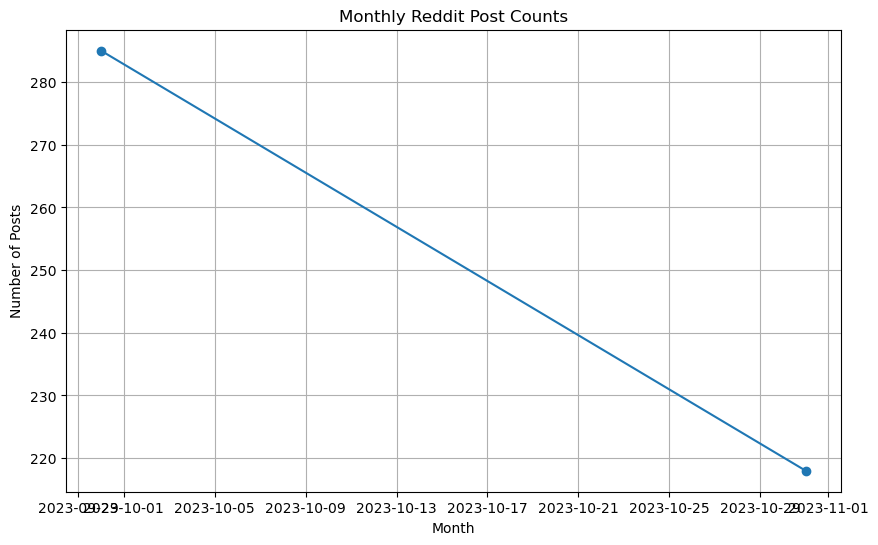

In [270]:
df.set_index('datetime', inplace=True)

# Group by month and count the number of posts
monthly_post_counts = df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_post_counts.index, monthly_post_counts.values, marker='o')
plt.title('Monthly Reddit Post Counts')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid()
plt.show()

In [271]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [272]:
df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime
datetime,,,,,,,,,,,,,,,,,,,,
2023-10-17 12:17:59,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...,after chatgpt disruption stack overflow lays o...,,remember when everyone said it was just a coin...,"[after, chatgpt, disruption, stack, overflow, ...",[],"[remember, when, everyone, said, it, was, just...","[chatgpt, disruption, stack, overflow, lays, 2...",[],"[remember, everyone, said, coincidence, site, ...",2023-10-17,12:17:59,2023-10-17 12:17:59
2023-10-17 14:10:52,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.,how very lucky to be alive,ive always thought it was weird that i find my...,almost too lucky. very sus.,"[how, very, lucky, to, be, alive]","[ive, always, thought, it, was, weird, that, i...","[almost, too, lucky, ., very, sus, .]","[lucky, alive]","[ive, always, thought, weird, find, existing, ...","[almost, lucky, sus]",2023-10-17,14:10:52,2023-10-17 14:10:52
2023-10-17 18:53:13,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,"didnt find any technical specification, just s...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca...",2023-10-17,18:53:13,2023-10-17 18:53:13
2023-10-17 20:26:16,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...,prompt crafting remains important gpt4 is fixe...,\nin case someone wants to play around with it...,it was right by the way. the animal in the ima...,"[prompt, crafting, remains, important, gpt4, i...","[in, case, someone, wants, to, play, around, w...","[it, was, right, by, the, way, ., the, animal,...","[prompt, crafting, remains, important, gpt4, f...","[case, someone, wants, play, around, system, p...","[right, way, animal, image, beluga, whale, gpt...",2023-10-17,20:26:16,2023-10-17 20:26:16
2023-10-17 20:43:13,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh...",jimmy apple returns with news of arrakis,,"okay boys i paid for it, here are the screensh...","[jimmy, apple, returns, with, news, of, arrakis]",[],"[okay, boys, i, paid, for, it, ,, here, are, t...","[jimmy, apple, returns, news, arrakis]",[],"[okay, boys, paid, screenshots, https, //x.com...",2023-10-17,20:43:13,2023-10-17 20:43:13


#### Cleaning results

In [273]:
from collections import Counter
import matplotlib.pyplot as plt
token_counter = Counter(token for tokens in df['tokenized_text'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'ive': 23, 'always': 25, 'thought': 27, 'it': 597, 'was': 92, 'weird': 1, 'that': 576, 'i': 449, 'find': 25, 'myself': 10, 'existing': 10, 'at': 146, 'the': 1579, 'most': 63, 'pivotal': 1, 'time': 95, 'in': 561, 'human': 90, 'history': 8, 'and': 1047, 'future': 57, 'never': 20, 'before': 22, 'have': 226, 'we': 307, 'been': 52, 'shadow': 1, 'of': 934, 'a': 972, 'looking': 11, 'technological': 15, 'singularity': 42, 'will': 230, 'be': 411, 'ever': 18, 'again': 18, 'you': 338, 'can': 201, 'only': 67, 'convert': 1, 'world': 70, 'into': 49, 'simulation': 11, 'once': 18, 'thats': 49, 'exactly': 11, 'what': 234, 'entails': 1, 'after': 30, 'want': 55, 'clearer': 1, 'picture': 9, 'our': 132, 'past': 16, 'so': 133, 'produce': 7, 'ancestor': 1, 'simulations': 2, 'question': 25, 'is': 549, 'which': 79, 'ancestors': 3, 'simulate': 8, 'ones': 19, 'lived': 3, 'just': 138, 'prior': 2, 'to': 1170, 'awakening': 2, 'course': 16, 'those': 36, 'are': 232, 'left': 5, 'hard': 8, 'evidence': 3, 'their': 113,

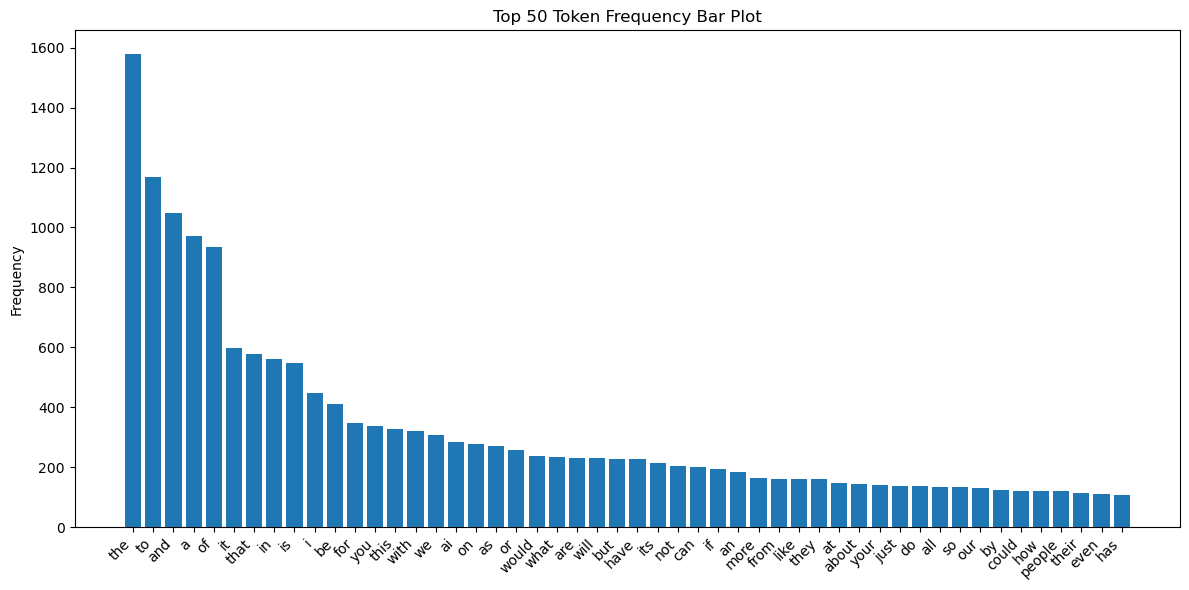

In [274]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [275]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_text_no_stopwords'] for token in tokens)
token_frequency = dict(token_counter)
print(token_frequency)

{'ive': 23, 'always': 25, 'thought': 27, 'weird': 1, 'find': 25, 'existing': 10, 'pivotal': 1, 'time': 95, 'human': 90, 'history': 8, 'future': 57, 'never': 20, 'shadow': 1, 'looking': 11, 'technological': 15, 'singularity': 42, 'ever': 18, 'convert': 1, 'world': 70, 'simulation': 11, 'thats': 49, 'exactly': 11, 'entails': 1, 'want': 55, 'clearer': 1, 'picture': 9, 'past': 16, 'produce': 7, 'ancestor': 1, 'simulations': 2, 'question': 25, 'ancestors': 3, 'simulate': 8, 'ones': 19, 'lived': 3, 'prior': 2, 'awakening': 2, 'course': 16, 'left': 5, 'hard': 8, 'evidence': 3, 'existence': 17, 'need': 34, 'properly': 4, 'generations': 6, 'preceded': 1, 'whose': 1, 'memories': 6, 'directly': 12, 'consumed': 1, 'available': 5, 'youll': 9, 'know': 77, 'accurate': 7, 'one': 77, 'way': 65, 'lives': 27, 'logically': 2, 'lead': 7, 'fidelity': 1, 'must': 9, 'see': 58, 'match': 2, 'final': 6, 'leading': 6, 'living': 16, 'event': 2, 'error': 2, 'metric': 1, 'simulated': 5, 'every': 31, 'test': 7, 'far'

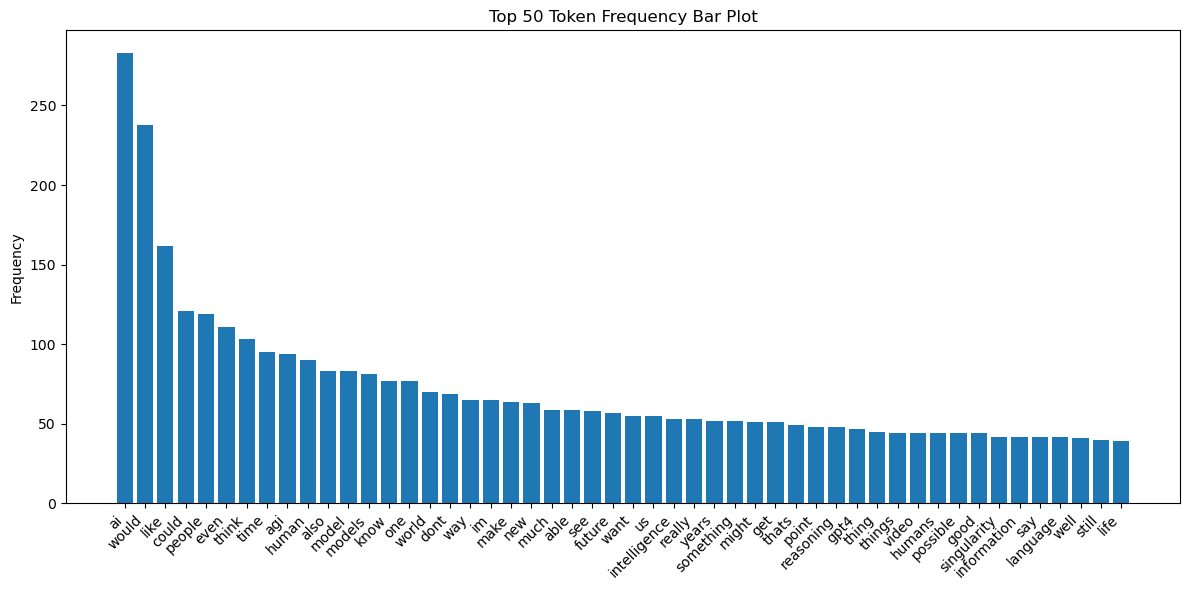

In [276]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [277]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_title'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'after': 8, 'chatgpt': 13, 'disruption': 1, 'stack': 2, 'overflow': 1, 'lays': 1, 'off': 4, '28': 1, 'percent': 1, 'of': 155, 'staff': 1, 'how': 45, 'very': 9, 'lucky': 1, 'to': 176, 'be': 51, 'alive': 2, 'baidu': 2, 'released': 4, 'ernie': 1, '40': 1, 'ceo': 4, 'robin': 1, 'li': 1, 'claims': 2, 'their': 16, 'ai': 154, 'model': 30, 'is': 107, 'finally': 2, 'on': 51, 'par': 2, 'with': 68, 'openais': 5, 'gpt4': 17, 'charlie': 1, 'dai': 1, 'vice': 1, 'president': 2, 'and': 151, 'research': 9, 'director': 1, 'technology': 7, 'at': 18, 'forresterwe': 1, 'still': 4, 'need': 6, 'more': 24, 'benchmarking': 1, 'evidence': 2, 'prove': 1, 'it': 34, 'but': 11, 'im': 4, 'cautiously': 1, 'optimistic': 2, 'that': 53, 'this': 31, 'chinas': 1, 'moment': 1, 'prompt': 4, 'crafting': 1, 'remains': 1, 'important': 3, 'fixed': 2, 'in': 92, 'time': 13, 'so': 10, 'what': 41, 'for': 66, 'us': 9, 'thinking': 2, 'token': 2, 'count': 1, 'its': 30, 'basically': 1, 'the': 198, 'difference': 1, 'if': 8, 'you': 47, 

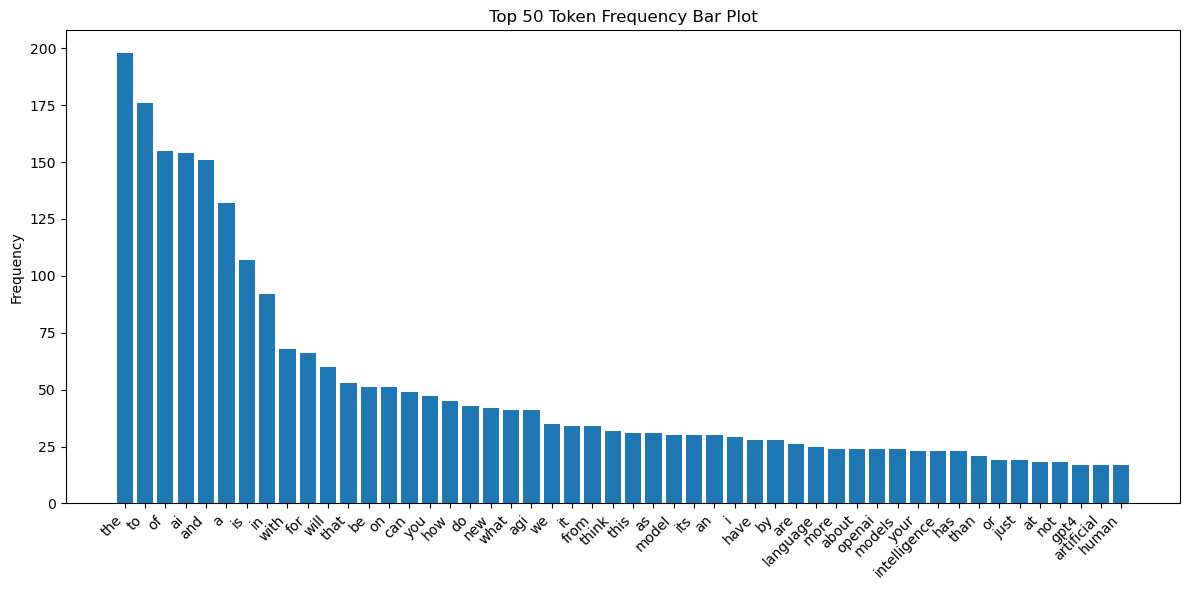

In [278]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [279]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_title_no_stopwords'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'chatgpt': 13, 'disruption': 1, 'stack': 2, 'overflow': 1, 'lays': 1, '28': 1, 'percent': 1, 'staff': 1, 'lucky': 1, 'alive': 2, 'baidu': 2, 'released': 4, 'ernie': 1, '40': 1, 'ceo': 4, 'robin': 1, 'li': 1, 'claims': 2, 'ai': 154, 'model': 30, 'finally': 2, 'par': 2, 'openais': 5, 'gpt4': 17, 'charlie': 1, 'dai': 1, 'vice': 1, 'president': 2, 'research': 9, 'director': 1, 'technology': 7, 'forresterwe': 1, 'still': 4, 'need': 6, 'benchmarking': 1, 'evidence': 2, 'prove': 1, 'im': 4, 'cautiously': 1, 'optimistic': 2, 'chinas': 1, 'moment': 1, 'prompt': 4, 'crafting': 1, 'remains': 1, 'important': 3, 'fixed': 2, 'time': 13, 'us': 9, 'thinking': 2, 'token': 2, 'count': 1, 'basically': 1, 'difference': 1, 'say': 4, 'something': 7, 'gut': 1, 'vs': 5, 'actively': 2, 'jimmy': 8, 'apple': 1, 'returns': 1, 'news': 3, 'arrakis': 3, 'paywall': 2, 'openai': 24, 'dropped': 2, 'work': 6, 'new': 42, 'rare': 1, 'setback': 1, 'two': 3, 'feature': 1, 'announcements': 1, 'seem': 7, 'forgotten': 2, 'lon

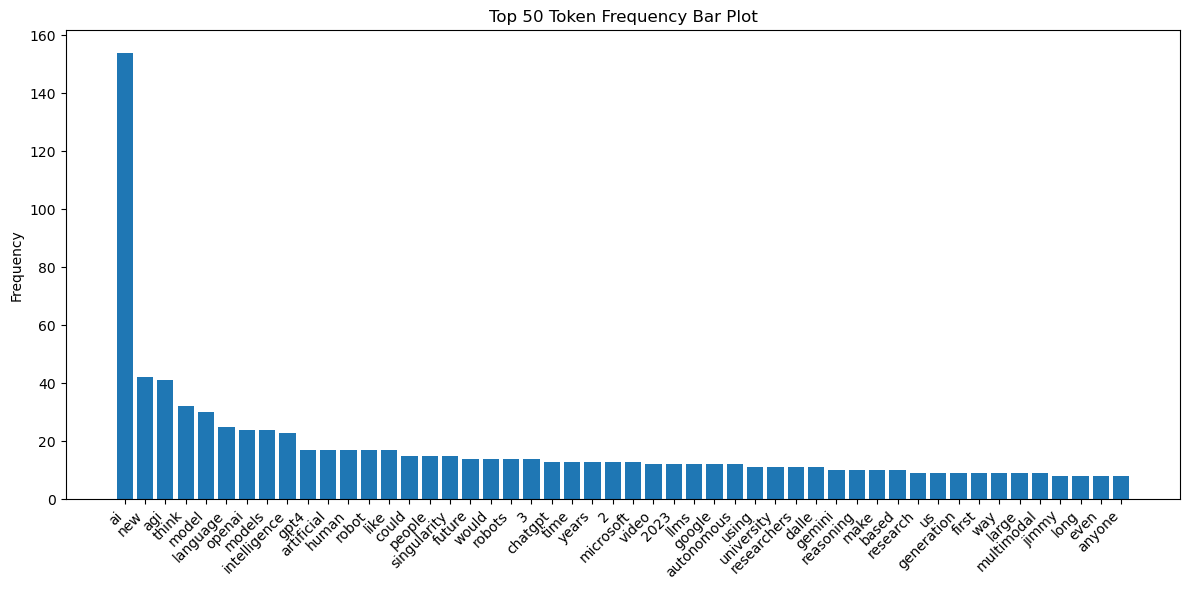

In [280]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))

top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [281]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_comments'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'remember': 8, 'when': 63, 'everyone': 9, 'said': 20, 'it': 518, 'was': 77, 'just': 94, 'a': 658, 'coincidence': 1, 'that': 429, 'site': 4, 'traffic': 2, 'dropped': 3, 'off': 9, 'after': 20, 'chatgpt': 16, 'released': 5, '?': 153, 'yea': 3, '.': 1284, 'almost': 11, 'too': 16, 'lucky': 3, 'very': 54, 'sus': 1, 'didnt': 1, 'find': 16, 'any': 43, 'technical': 2, 'specification': 1, ',': 1087, 'showcase': 2, 'like': 125, 'this': 244, 'for': 263, 'those': 27, 'who': 37, 'know': 61, 'some': 63, 'chinese': 1, '[': 50, 'https': 83, ':': 185, '//www.youtube.com/watch': 4, 'v=eyxmcml0bs4': 2, ']': 50, '(': 151, ')': 157, 'right': 28, 'by': 98, 'the': 1093, 'way': 38, 'animal': 1, 'in': 357, 'image': 8, 'is': 482, 'beluga': 1, 'whale': 1, 'here': 26, 'what': 116, 'gpt-4': 22, 'says': 5, 'without': 22, 'custom': 1, 'instructions': 1, '//preview.redd.it/t9zne9sjotub1.png': 1, 'width=1124': 1, '&': 35, 'format=png': 4, 'auto=webp': 7, 's=e20df4922580530f8f15a0719d75e13a361e7b34': 1, 'never': 14, 'g

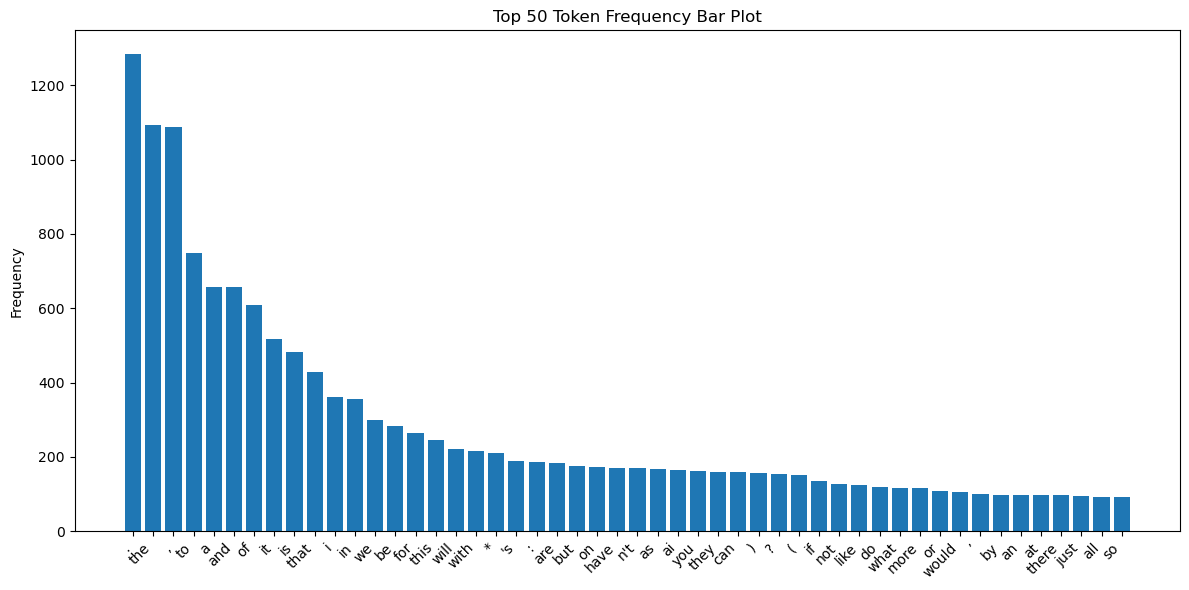

In [282]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [283]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_comments_no_stopwords'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'remember': 8, 'everyone': 9, 'said': 20, 'coincidence': 1, 'site': 4, 'traffic': 2, 'dropped': 3, 'chatgpt': 16, 'released': 5, 'yea': 3, 'almost': 11, 'lucky': 3, 'sus': 1, 'didnt': 1, 'find': 16, 'technical': 2, 'specification': 1, 'showcase': 2, 'like': 125, 'know': 61, 'chinese': 1, '[': 50, 'https': 83, '//www.youtube.com/watch': 4, 'v=eyxmcml0bs4': 2, ']': 50, '(': 151, ')': 157, 'right': 28, 'way': 38, 'animal': 1, 'image': 8, 'beluga': 1, 'whale': 1, 'gpt-4': 22, 'says': 5, 'without': 22, 'custom': 1, 'instructions': 1, '//preview.redd.it/t9zne9sjotub1.png': 1, 'width=1124': 1, '&': 35, 'format=png': 4, 'auto=webp': 7, 's=e20df4922580530f8f15a0719d75e13a361e7b34': 1, 'never': 14, 'gets': 10, 'sometimes': 5, 'elephant': 2, 'crocodile': 1, 'cow': 1, 'okay': 3, 'boys': 1, 'paid': 3, 'screenshots': 2, '//x.com/sidspodcast1/status/1714396049438015524': 1, 's=46': 1, 't=dvtgje78fcq9qlvfk7kopw': 1, 'read': 17, 'seems': 26, 'openai': 18, 'scrap': 1, '*': 210, 'launch': 2, 'arrakis': 

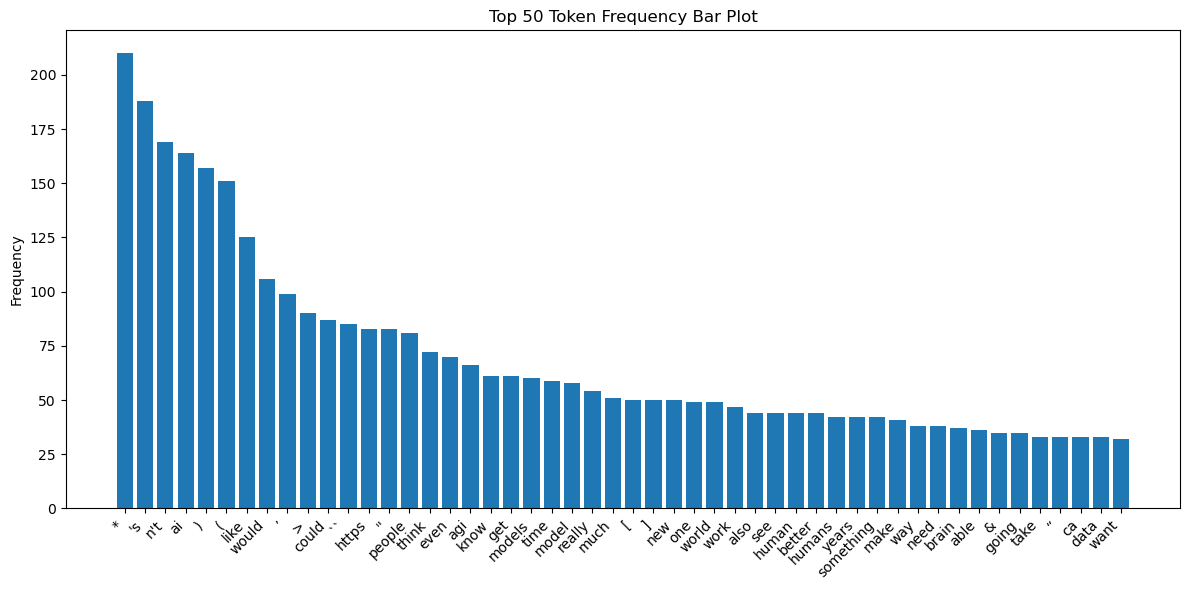

In [284]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))

top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

### Sentiment Analysis

In [285]:
#Initially i am defining the functions for calculating the number of positve and negative words and then finally computing the sentiment by subtracting the positive and negative count

In [286]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# load set of positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)

# load set of negative words
lNegWords = []
with open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [287]:
def computeSentiment(lTokens, setPosWords, setNegWords):
    posNum = len([tok for tok in lTokens if tok in setPosWords])
    negNum = len([tok for tok in lTokens if tok in setNegWords])
    sentiment = posNum - negNum
    return sentiment


In [288]:
from colorama import Fore, Back, Style
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    for token in lTokens:
        if token in setPosWords:
            print(Fore.RED + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.BLUE + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

##### Calculating the sentiment for post title 

In [289]:
for index, row in df.iterrows():
    text = row['tokenized_title_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)

    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment_title'] = sentiment 

df.head()

chatgpt, disruption, stack, overflow, lays, 28, percent, staff, : -1
lucky, alive, : 1
baidu, released, ernie, 40, ceo, robin, li, claims, ai, model, finally, par, openais, gpt4, charlie, dai, vice, president, research, director, technology, forresterwe, still, need, benchmarking, evidence, prove, im, cautiously, optimistic, chinas, gpt4, moment, : 0
prompt, crafting, remains, important, gpt4, fixed, time, us, thinking, time, token, count, gpt4, basically, difference, say, something, gut, vs, actively, thinking, : 2
jimmy, apple, returns, news, arrakis, : 0
paywall, openai, dropped, work, new, arrakis, ai, model, rare, setback, : 0
two, gpt4, feature, announcements, seem, forgotten, still, released, long, term, memory, video, : 0
ai, predictions, 2023, 2026, : 0
believe, artificial, intelligence, alchemy, philosophers, stone, literally, making, sand, think, believe, artificial, intelligence, best, thought, universal, problem, solver, lot, problems, solve, : 1
technooptimist, manifesto,

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-17 12:17:59,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...,after chatgpt disruption stack overflow lays o...,,...,"[after, chatgpt, disruption, stack, overflow, ...",[],"[remember, when, everyone, said, it, was, just...","[chatgpt, disruption, stack, overflow, lays, 2...",[],"[remember, everyone, said, coincidence, site, ...",2023-10-17,12:17:59,2023-10-17 12:17:59,-1.0
2023-10-17 14:10:52,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.,how very lucky to be alive,ive always thought it was weird that i find my...,...,"[how, very, lucky, to, be, alive]","[ive, always, thought, it, was, weird, that, i...","[almost, too, lucky, ., very, sus, .]","[lucky, alive]","[ive, always, thought, weird, find, existing, ...","[almost, lucky, sus]",2023-10-17,14:10:52,2023-10-17 14:10:52,1.0
2023-10-17 18:53:13,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,...,"[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca...",2023-10-17,18:53:13,2023-10-17 18:53:13,0.0
2023-10-17 20:26:16,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...,prompt crafting remains important gpt4 is fixe...,\nin case someone wants to play around with it...,...,"[prompt, crafting, remains, important, gpt4, i...","[in, case, someone, wants, to, play, around, w...","[it, was, right, by, the, way, ., the, animal,...","[prompt, crafting, remains, important, gpt4, f...","[case, someone, wants, play, around, system, p...","[right, way, animal, image, beluga, whale, gpt...",2023-10-17,20:26:16,2023-10-17 20:26:16,2.0
2023-10-17 20:43:13,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh...",jimmy apple returns with news of arrakis,,...,"[jimmy, apple, returns, with, news, of, arrakis]",[],"[okay, boys, i, paid, for, it, ,, here, are, t...","[jimmy, apple, returns, news, arrakis]",[],"[okay, boys, paid, screenshots, https, //x.com...",2023-10-17,20:43:13,2023-10-17 20:43:13,0.0


In [290]:
df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-17 12:17:59,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...,after chatgpt disruption stack overflow lays o...,,...,"[after, chatgpt, disruption, stack, overflow, ...",[],"[remember, when, everyone, said, it, was, just...","[chatgpt, disruption, stack, overflow, lays, 2...",[],"[remember, everyone, said, coincidence, site, ...",2023-10-17,12:17:59,2023-10-17 12:17:59,-1.0
2023-10-17 14:10:52,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.,how very lucky to be alive,ive always thought it was weird that i find my...,...,"[how, very, lucky, to, be, alive]","[ive, always, thought, it, was, weird, that, i...","[almost, too, lucky, ., very, sus, .]","[lucky, alive]","[ive, always, thought, weird, find, existing, ...","[almost, lucky, sus]",2023-10-17,14:10:52,2023-10-17 14:10:52,1.0
2023-10-17 18:53:13,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,...,"[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca...",2023-10-17,18:53:13,2023-10-17 18:53:13,0.0
2023-10-17 20:26:16,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...,prompt crafting remains important gpt4 is fixe...,\nin case someone wants to play around with it...,...,"[prompt, crafting, remains, important, gpt4, i...","[in, case, someone, wants, to, play, around, w...","[it, was, right, by, the, way, ., the, animal,...","[prompt, crafting, remains, important, gpt4, f...","[case, someone, wants, play, around, system, p...","[right, way, animal, image, beluga, whale, gpt...",2023-10-17,20:26:16,2023-10-17 20:26:16,2.0
2023-10-17 20:43:13,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh...",jimmy apple returns with news of arrakis,,...,"[jimmy, apple, returns, with, news, of, arrakis]",[],"[okay, boys, i, paid, for, it, ,, here, are, t...","[jimmy, apple, returns, news, arrakis]",[],"[okay, boys, paid, screenshots, https, //x.com...",2023-10-17,20:43:13,2023-10-17 20:43:13,0.0


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2023-10-17 12:17:59 to 2023-09-13 22:35:53
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   title                            503 non-null    object        
 1   author                           503 non-null    object        
 2   score                            503 non-null    int64         
 3   Number of comments               503 non-null    int64         
 4   self text                        503 non-null    object        
 5   timestamp                        503 non-null    float64       
 6   upvoteratio                      503 non-null    float64       
 7   comments                         503 non-null    object        
 8   Title                            503 non-null    object        
 9   Self Text                        503 non-null    object        
 10  Top Comments             

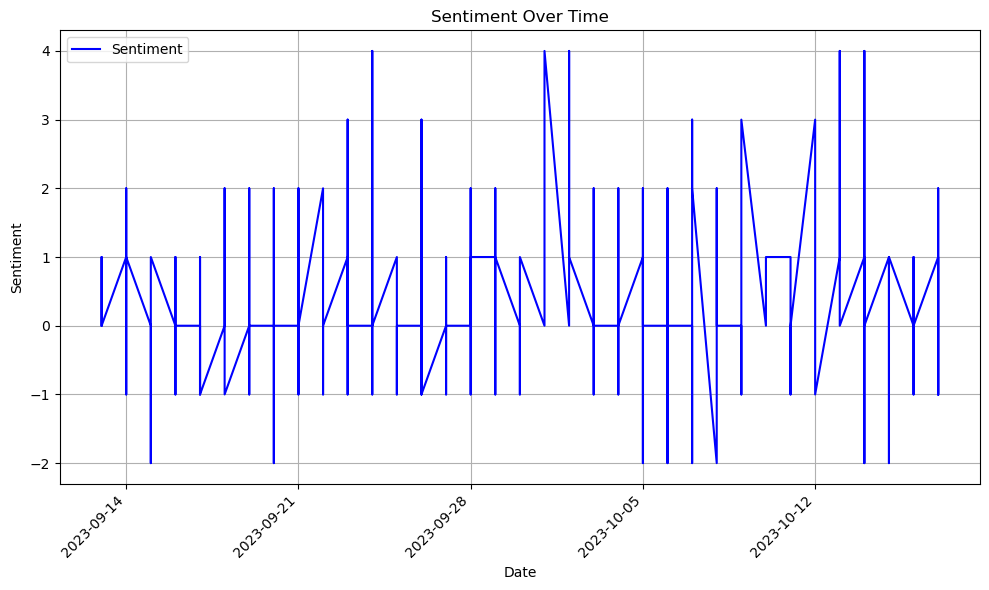

In [292]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(df['date'], df['sentiment_title'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


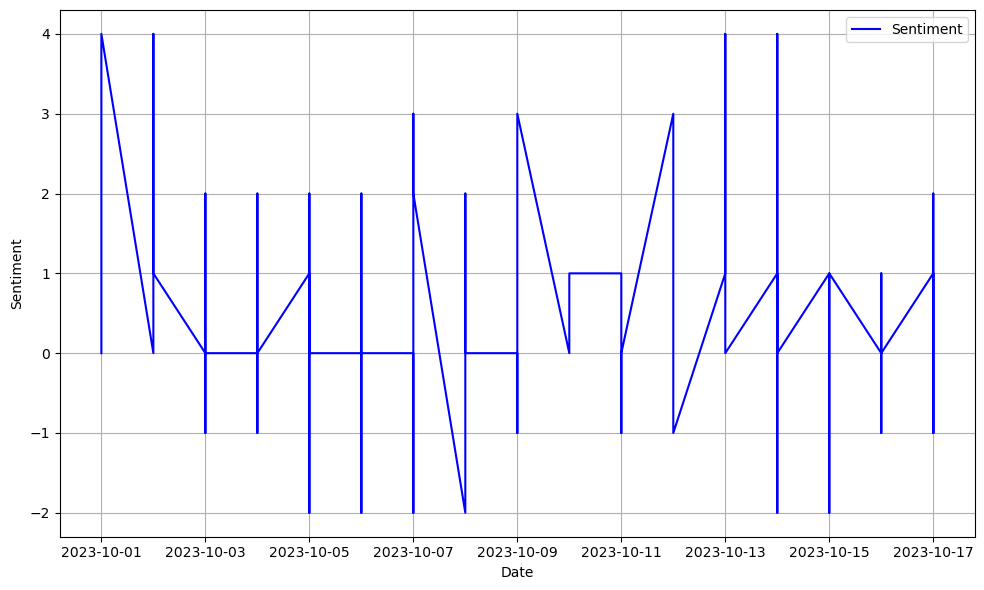

In [293]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with a 'date' column
# Convert the 'date' column to a datetime object (if not already)
df['date'] = pd.to_datetime(df['date'])

# Specify the month and year you want to plot
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment_title'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##### Calculating the sentiment for the post content

In [294]:
for index, row in df.iterrows():
    text = row['tokenized_text_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)
    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment'] = sentiment = sentiment


df.head()

: 0
: 0
: 0
technological, advancements, brought, hypothetical, singularity, resources, labor, become, devalued, imagine, world, sourcing, materials, labor, robotics, building, homes, becomes, costeffective, accessible, everyone, scenario, remaining, variable, land, finite, resource, society, money, loses, significance, due, abundance, role, land, becomes, intriguing, would, people, motivated, sell, land, world, without, money, would, land, acquired, shared, among, dont, yet, especially, world, labor, lost, value, raises, question, whether, current, landowners, excess, holdings, might, face, eminent, domain, promote, fairness, even, hyperefficient, land, usage, industry, residential, purposes, earths, land, resources, remain, finite, perhaps, come, realize, dont, require, additional, land, support, population, significant, portion, left, coexist, nature, think, still, premium, wanting, live, land, untouched, areas, think, : 5
: 0
: 0
must, heard, neuralink, must, many, older, current, 

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-13 22:35:53,Preprint: Machine Learning for Hypothesis Gene...,Dr_Singularity,13,2,,1.694645e+09,1.00,ELI5. Implications?,preprint machine learning for hypothesis gener...,,...,[],"[eli5, ., implications, ?]","[preprint, machine, learning, hypothesis, gene...",[],"[eli5, implications]",2023-09-13,22:35:53,2023-09-13 22:35:53,0.0,0.0
2023-09-13 13:57:32,I created this video entirely on my cell phone...,johngrady77,695,124,,1.694613e+09,0.97,When this is real time (or even within 5 secon...,i created this video entirely on my cell phone...,,...,[],"[when, this, is, real, time, (, or, even, with...","[created, video, entirely, cell, phone, minute...",[],"[real, time, (, even, within, 5, seconds, ), w...",2023-09-13,13:57:32,2023-09-13 13:57:32,1.0,0.0
2023-09-13 14:04:48,NEW AI HeyGen can translate any video,Gab1024,132,47,,1.694614e+09,0.95,It's going to be really cool when this technol...,new ai heygen can translate any video,,...,[],"[it, 's, going, to, be, really, cool, when, th...","[new, ai, heygen, translate, video]",[],"['s, going, really, cool, technology, becomes,...",2023-09-13,14:04:48,2023-09-13 14:04:48,0.0,0.0
2023-09-13 15:21:53,Value of Land in Post-Scarcity Societies?,haitian5881,42,65,With technological advancements brought about ...,1.694619e+09,0.95,Excellent question that I'm excited to read re...,value of land in postscarcity societies,with technological advancements brought about ...,...,"[with, technological, advancements, brought, a...","[excellent, question, that, i, 'm, excited, to...","[value, land, postscarcity, societies]","[technological, advancements, brought, hypothe...","[excellent, question, 'm, excited, read, respo...",2023-09-13,15:21:53,2023-09-13 15:21:53,0.0,5.0
2023-09-13 11:45:24,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs ...,stable audio texttomusic generation by stabili...,,...,[],"[why, ai-made, music, often, sounds, so, flat,...","[stable, audio, texttomusic, generation, stabi...",[],"[ai-made, music, often, sounds, flat, low, bit...",2023-09-13,11:45:24,2023-09-13 11:45:24,1.0,0.0


In [295]:
df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-13 22:35:53,Preprint: Machine Learning for Hypothesis Gene...,Dr_Singularity,13,2,,1.694645e+09,1.00,ELI5. Implications?,preprint machine learning for hypothesis gener...,,...,[],"[eli5, ., implications, ?]","[preprint, machine, learning, hypothesis, gene...",[],"[eli5, implications]",2023-09-13,22:35:53,2023-09-13 22:35:53,0.0,0.0
2023-09-13 13:57:32,I created this video entirely on my cell phone...,johngrady77,695,124,,1.694613e+09,0.97,When this is real time (or even within 5 secon...,i created this video entirely on my cell phone...,,...,[],"[when, this, is, real, time, (, or, even, with...","[created, video, entirely, cell, phone, minute...",[],"[real, time, (, even, within, 5, seconds, ), w...",2023-09-13,13:57:32,2023-09-13 13:57:32,1.0,0.0
2023-09-13 14:04:48,NEW AI HeyGen can translate any video,Gab1024,132,47,,1.694614e+09,0.95,It's going to be really cool when this technol...,new ai heygen can translate any video,,...,[],"[it, 's, going, to, be, really, cool, when, th...","[new, ai, heygen, translate, video]",[],"['s, going, really, cool, technology, becomes,...",2023-09-13,14:04:48,2023-09-13 14:04:48,0.0,0.0
2023-09-13 15:21:53,Value of Land in Post-Scarcity Societies?,haitian5881,42,65,With technological advancements brought about ...,1.694619e+09,0.95,Excellent question that I'm excited to read re...,value of land in postscarcity societies,with technological advancements brought about ...,...,"[with, technological, advancements, brought, a...","[excellent, question, that, i, 'm, excited, to...","[value, land, postscarcity, societies]","[technological, advancements, brought, hypothe...","[excellent, question, 'm, excited, read, respo...",2023-09-13,15:21:53,2023-09-13 15:21:53,0.0,5.0
2023-09-13 11:45:24,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs ...,stable audio texttomusic generation by stabili...,,...,[],"[why, ai-made, music, often, sounds, so, flat,...","[stable, audio, texttomusic, generation, stabi...",[],"[ai-made, music, often, sounds, flat, low, bit...",2023-09-13,11:45:24,2023-09-13 11:45:24,1.0,0.0


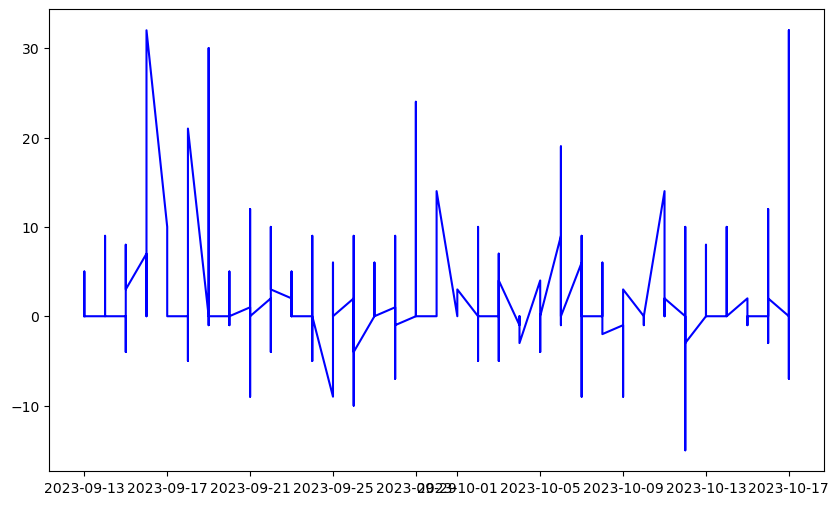

In [296]:
import matplotlib.pyplot as plt
df = df.sort_values(by='date')
plt.figure(figsize=(10, 6)) 
plt.plot(df['date'], df['sentiment'], color='b', label='Sentiment')

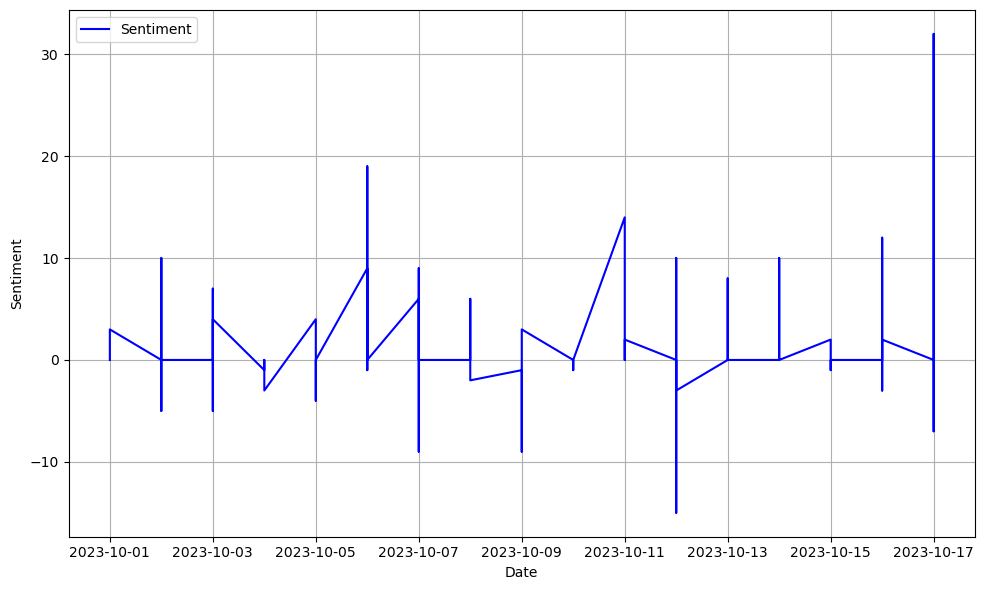

In [297]:
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Vader method

In [298]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def vaderPrintTokens(lTokens, dSentimentScores):

    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [299]:
def vaderSentimentAnalysis(postText, bPrint, tweetProcessor):

    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    lTokens = redditProcessor.process(postText)

    dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
    lSentiment.append(dSentimentScores)

    if bPrint:
        vaderPrintTokens(lTokens, dSentimentScores)
                
                    
    return lSentiment

In [300]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tweetTokenizer = TweetTokenizer()
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']


redditProcessor = RedditProcessing.RedditProcessing(tweetTokenizer, lStopwords)
for index, row in df.iterrows():
    text = row['Title']
    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_title_vader'] = sentiment[0]['compound']


df.head()

preprint machine learning for hypothesis generation in biology and medicine [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
i created this video entirely on my cell phone in just a few minutes using the new heygen video translator tool i dont think people realize how quickly and profoundly our world is changing because of ai [{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.25}]
new ai heygen can translate any video [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
value of land in postscarcity societies [{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}]
stable audio texttomusic generation by stabilityai [{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}]
this neural net maps molecules to aromas  sights and sounds are easily digitized but scents have eluded researchers until now [{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.34}]
lingo1 exploring natural language for autonomous driving  wayve [{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'co

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_title_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-13 22:35:53,Preprint: Machine Learning for Hypothesis Gene...,Dr_Singularity,13,2,,1.694645e+09,1.00,ELI5. Implications?,preprint machine learning for hypothesis gener...,,...,"[eli5, ., implications, ?]","[preprint, machine, learning, hypothesis, gene...",[],"[eli5, implications]",2023-09-13,22:35:53,2023-09-13 22:35:53,0.0,0.0,0.000
2023-09-13 13:57:32,I created this video entirely on my cell phone...,johngrady77,695,124,,1.694613e+09,0.97,When this is real time (or even within 5 secon...,i created this video entirely on my cell phone...,,...,"[when, this, is, real, time, (, or, even, with...","[created, video, entirely, cell, phone, minute...",[],"[real, time, (, even, within, 5, seconds, ), w...",2023-09-13,13:57:32,2023-09-13 13:57:32,1.0,0.0,0.250
2023-09-13 14:04:48,NEW AI HeyGen can translate any video,Gab1024,132,47,,1.694614e+09,0.95,It's going to be really cool when this technol...,new ai heygen can translate any video,,...,"[it, 's, going, to, be, really, cool, when, th...","[new, ai, heygen, translate, video]",[],"['s, going, really, cool, technology, becomes,...",2023-09-13,14:04:48,2023-09-13 14:04:48,0.0,0.0,0.000
2023-09-13 15:21:53,Value of Land in Post-Scarcity Societies?,haitian5881,42,65,With technological advancements brought about ...,1.694619e+09,0.95,Excellent question that I'm excited to read re...,value of land in postscarcity societies,with technological advancements brought about ...,...,"[excellent, question, that, i, 'm, excited, to...","[value, land, postscarcity, societies]","[technological, advancements, brought, hypothe...","[excellent, question, 'm, excited, read, respo...",2023-09-13,15:21:53,2023-09-13 15:21:53,0.0,5.0,0.340
2023-09-13 11:45:24,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs ...,stable audio texttomusic generation by stabili...,,...,"[why, ai-made, music, often, sounds, so, flat,...","[stable, audio, texttomusic, generation, stabi...",[],"[ai-made, music, often, sounds, flat, low, bit...",2023-09-13,11:45:24,2023-09-13 11:45:24,1.0,0.0,0.296


In [301]:
for index, row in df.iterrows():
    text = row['Self Text']

    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_text_vader'] = sentiment[0]['compound'] 

df.head()

 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
with technological advancements brought about by a hypothetical singularity resources and labor become devalued imagine a world where sourcing materials and labor robotics for building homes becomes so costeffective that its accessible to everyone in this scenario the only remaining variable is land a finite resource in a society where money loses its significance due to abundance the role of land becomes intriguing

 how would people be motivated to sell their land in a world without money how would land be acquired and shared among those who dont yet own it especially in a world where labor has lost its value to me it raises a question about whether current landowners with excess holdings might face eminent domain to promote fairness even with hyperefficient land usage for both industry and residential purposes the 

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_title_vader,sentiment_text_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-13 22:35:53,Preprint: Machine Learning for Hypothesis Gene...,Dr_Singularity,13,2,,1.694645e+09,1.00,ELI5. Implications?,preprint machine learning for hypothesis gener...,,...,"[preprint, machine, learning, hypothesis, gene...",[],"[eli5, implications]",2023-09-13,22:35:53,2023-09-13 22:35:53,0.0,0.0,0.000,0.0000
2023-09-13 13:57:32,I created this video entirely on my cell phone...,johngrady77,695,124,,1.694613e+09,0.97,When this is real time (or even within 5 secon...,i created this video entirely on my cell phone...,,...,"[created, video, entirely, cell, phone, minute...",[],"[real, time, (, even, within, 5, seconds, ), w...",2023-09-13,13:57:32,2023-09-13 13:57:32,1.0,0.0,0.250,0.0000
2023-09-13 14:04:48,NEW AI HeyGen can translate any video,Gab1024,132,47,,1.694614e+09,0.95,It's going to be really cool when this technol...,new ai heygen can translate any video,,...,"[new, ai, heygen, translate, video]",[],"['s, going, really, cool, technology, becomes,...",2023-09-13,14:04:48,2023-09-13 14:04:48,0.0,0.0,0.000,0.0000
2023-09-13 15:21:53,Value of Land in Post-Scarcity Societies?,haitian5881,42,65,With technological advancements brought about ...,1.694619e+09,0.95,Excellent question that I'm excited to read re...,value of land in postscarcity societies,with technological advancements brought about ...,...,"[value, land, postscarcity, societies]","[technological, advancements, brought, hypothe...","[excellent, question, 'm, excited, read, respo...",2023-09-13,15:21:53,2023-09-13 15:21:53,0.0,5.0,0.340,0.8789
2023-09-13 11:45:24,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs ...,stable audio texttomusic generation by stabili...,,...,"[stable, audio, texttomusic, generation, stabi...",[],"[ai-made, music, often, sounds, flat, low, bit...",2023-09-13,11:45:24,2023-09-13 11:45:24,1.0,0.0,0.296,0.0000


In [302]:
for index, row in df.iterrows():
    text = row['Top Comments']

    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_comm_vader'] = sentiment[0]['compound'] 

df.head()

eli5. implications? [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
when this is real time (or even within 5 seconds), the world changes significantly. probably less than a year [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
it's going to be really cool when this technology becomes even better.

i'll finally be able to watch japanese youtubers and understand what they're saying, and youtubers won't have to pay someone to translate their content.

an exciting time we're living in! [{'neg': 0.045, 'neu': 0.675, 'pos': 0.28, 'compound': 0.807}]
excellent question that i'm excited to read responses to. there's plenty of land in the world, but not a lot of valuable land by current standards. people value land by proximity to jobs, stores and readily available natural resources. i wonder if a post scarcity positively aligned asi world would mean that abundant multi family communities could pop up in what we consider the current "wilderness" and we wouldn't have to worry abou

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-13 22:35:53,Preprint: Machine Learning for Hypothesis Gene...,Dr_Singularity,13,2,,1.694645e+09,1.00,ELI5. Implications?,preprint machine learning for hypothesis gener...,,...,[],"[eli5, implications]",2023-09-13,22:35:53,2023-09-13 22:35:53,0.0,0.0,0.000,0.0000,0.0000
2023-09-13 13:57:32,I created this video entirely on my cell phone...,johngrady77,695,124,,1.694613e+09,0.97,When this is real time (or even within 5 secon...,i created this video entirely on my cell phone...,,...,[],"[real, time, (, even, within, 5, seconds, ), w...",2023-09-13,13:57:32,2023-09-13 13:57:32,1.0,0.0,0.250,0.0000,0.0000
2023-09-13 14:04:48,NEW AI HeyGen can translate any video,Gab1024,132,47,,1.694614e+09,0.95,It's going to be really cool when this technol...,new ai heygen can translate any video,,...,[],"['s, going, really, cool, technology, becomes,...",2023-09-13,14:04:48,2023-09-13 14:04:48,0.0,0.0,0.000,0.0000,0.8070
2023-09-13 15:21:53,Value of Land in Post-Scarcity Societies?,haitian5881,42,65,With technological advancements brought about ...,1.694619e+09,0.95,Excellent question that I'm excited to read re...,value of land in postscarcity societies,with technological advancements brought about ...,...,"[technological, advancements, brought, hypothe...","[excellent, question, 'm, excited, read, respo...",2023-09-13,15:21:53,2023-09-13 15:21:53,0.0,5.0,0.340,0.8789,0.9427
2023-09-13 11:45:24,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs ...,stable audio texttomusic generation by stabili...,,...,[],"[ai-made, music, often, sounds, flat, low, bit...",2023-09-13,11:45:24,2023-09-13 11:45:24,1.0,0.0,0.296,0.0000,-0.2732


In [303]:
df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-13 22:35:53,Preprint: Machine Learning for Hypothesis Gene...,Dr_Singularity,13,2,,1.694645e+09,1.00,ELI5. Implications?,preprint machine learning for hypothesis gener...,,...,[],"[eli5, implications]",2023-09-13,22:35:53,2023-09-13 22:35:53,0.0,0.0,0.000,0.0000,0.0000
2023-09-13 13:57:32,I created this video entirely on my cell phone...,johngrady77,695,124,,1.694613e+09,0.97,When this is real time (or even within 5 secon...,i created this video entirely on my cell phone...,,...,[],"[real, time, (, even, within, 5, seconds, ), w...",2023-09-13,13:57:32,2023-09-13 13:57:32,1.0,0.0,0.250,0.0000,0.0000
2023-09-13 14:04:48,NEW AI HeyGen can translate any video,Gab1024,132,47,,1.694614e+09,0.95,It's going to be really cool when this technol...,new ai heygen can translate any video,,...,[],"['s, going, really, cool, technology, becomes,...",2023-09-13,14:04:48,2023-09-13 14:04:48,0.0,0.0,0.000,0.0000,0.8070
2023-09-13 15:21:53,Value of Land in Post-Scarcity Societies?,haitian5881,42,65,With technological advancements brought about ...,1.694619e+09,0.95,Excellent question that I'm excited to read re...,value of land in postscarcity societies,with technological advancements brought about ...,...,"[technological, advancements, brought, hypothe...","[excellent, question, 'm, excited, read, respo...",2023-09-13,15:21:53,2023-09-13 15:21:53,0.0,5.0,0.340,0.8789,0.9427
2023-09-13 11:45:24,Stable Audio: text-to-music generation by @Sta...,Danuer_,99,43,,1.694606e+09,0.92,Why AI-made music often sounds so flat?\n\nIs ...,stable audio texttomusic generation by stabili...,,...,[],"[ai-made, music, often, sounds, flat, low, bit...",2023-09-13,11:45:24,2023-09-13 11:45:24,1.0,0.0,0.296,0.0000,-0.2732


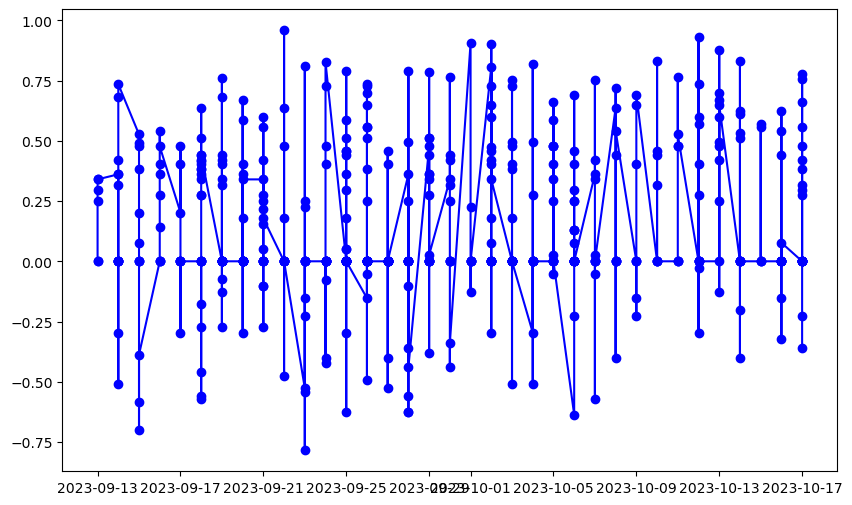

In [304]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_title_vader'], marker='o', linestyle='-', color='b', label='Sentiment')


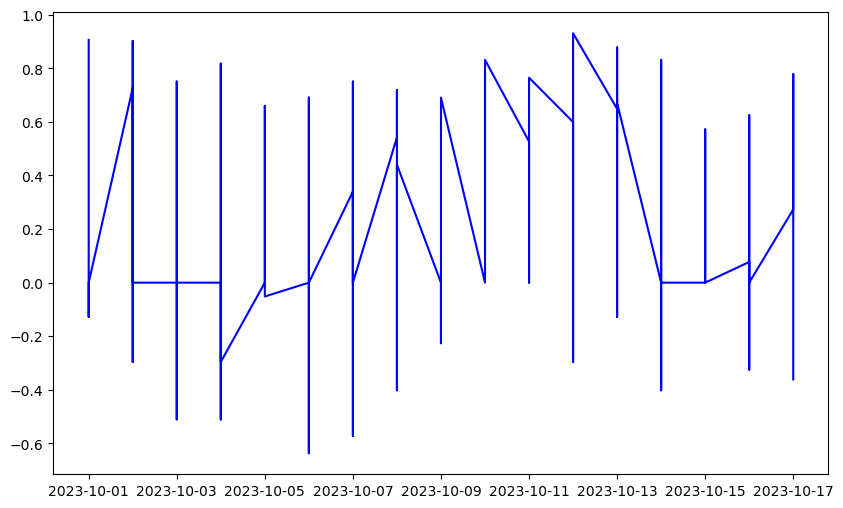

In [305]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_title_vader'], color='b', label='Sentiment')

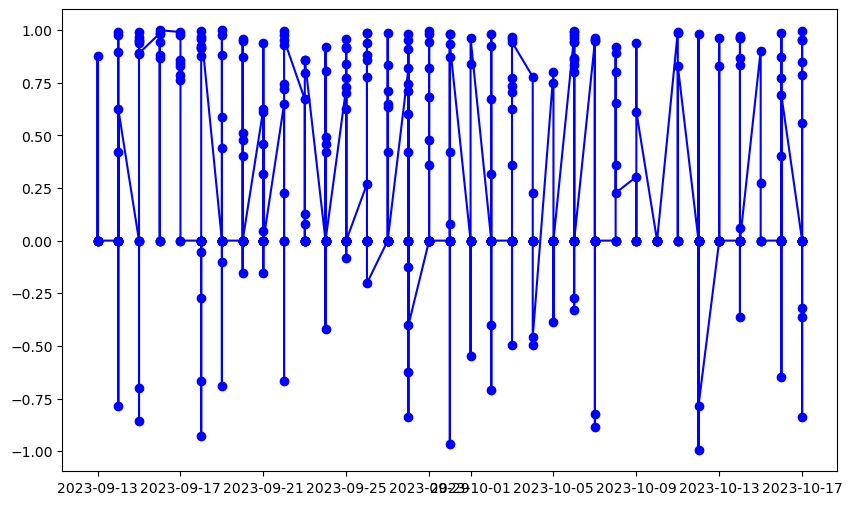

In [306]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_text_vader'], marker='o', linestyle='-', color='b', label='Sentiment')

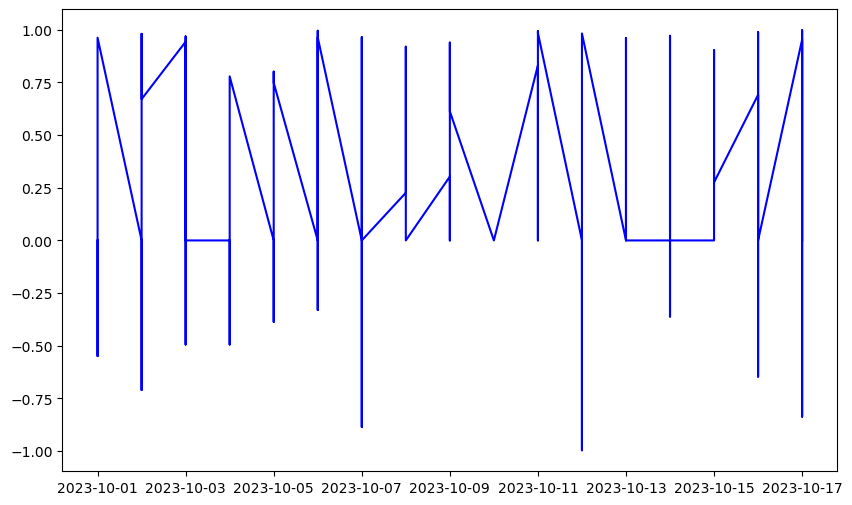

In [307]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_text_vader'], color='b', label='Sentiment')

In [308]:
df_2023 = df[(df['datetime'].dt.year == 2023) & (df['datetime'].dt.month == 10) & (df['datetime'].dt.day == 12)]
df_2023

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-12 02:20:55,Pi AI has up to date information. Does anyone ...,DragonForg,190,73,,1.697077e+09,0.92,I chatted with Pi for a while yesterday throug...,pi ai has up to date information does anyone k...,,...,[],"[chatted, pi, yesterday, voice, interface, sur...",2023-10-12,02:20:55,2023-10-12 02:20:55,0.0,0.0,0.0000,0.0000,0.7096
2023-10-12 11:41:56,What are these supposed “Risks” created by AI ...,BigZaddyZ3,9,73,This question is really more of a continuation...,1.697111e+09,0.62,The primary risk is caused by a symphony of er...,what are these supposed risks created by ai re...,this question is really more of a continuation...,...,"[question, really, continuation, conversation,...","[primary, risk, caused, symphony, errors, focu...",2023-10-12,11:41:56,2023-10-12 11:41:56,-1.0,-15.0,-0.0258,-0.9957,-0.9217
2023-10-12 07:48:56,"LLMs can’t self-correct in reasoning tasks, De...",Routine_Complaint_79,50,61,,1.697097e+09,0.78,There are multiple screenshots of chatgpt self...,llms cant selfcorrect in reasoning tasks deepm...,,...,[],"[multiple, screenshots, chatgpt, self, correct...",2023-10-12,07:48:56,2023-10-12 07:48:56,0.0,0.0,0.0000,0.0000,-0.0747
2023-10-12 18:35:20,Artificial intelligence and the future of huma...,Tao_Dragon,94,13,,1.697136e+09,0.94,I'm not sure everyone will agree with the auth...,artificial intelligence and the future of huma...,,...,[],"['m, sure, everyone, agree, author, 's, assump...",2023-10-12,18:35:20,2023-10-12 18:35:20,2.0,0.0,0.7351,0.0000,0.9558
2023-10-12 01:51:47,OpenAI is actively preventing a proto-AGI thin...,BeginningInfluence55,150,116,Would it be too overpowered or what?,1.697076e+09,0.82,People would probably play with all 3 at the s...,openai is actively preventing a protoagi thing...,would it be too overpowered or what,...,"[would, overpowered]","[people, would, probably, play, 3, time, burn,...",2023-10-12,01:51:47,2023-10-12 01:51:47,0.0,0.0,0.5719,0.0000,0.5859
2023-10-12 04:52:35,Groundbreaking achievement as bionic hand merg...,Melodic-Work7436,325,36,,1.697086e+09,0.99,This is so cool! I wonder if they can put some...,groundbreaking achievement as bionic hand merg...,,...,[],"[cool, wonder, put, silicone, skin, around, so...",2023-10-12,04:52:35,2023-10-12 04:52:35,1.0,0.0,0.2732,0.0000,0.3182
2023-10-12 02:41:55,I think about Human-AGI relationships like in ...,BeginningInfluence55,115,114,[this is some highly speculative showerthought...,1.697079e+09,0.86,There will be a particular niche for actual hu...,i think about humanagi relationships like in h...,this is some highly speculative showerthought ...,...,"[highly, speculative, showerthought, futuristi...","[particular, niche, actual, human, therapists,...",2023-10-12,02:41:55,2023-10-12 02:41:55,2.0,10.0,0.9308,0.9820,0.8271
2023-10-12 16:14:19,OpenAI plans major updates to lure developers ...,Gagarin1961,157,39,,1.697127e+09,0.97,"If I’m interpreting this correctly, it looks l...",openai plans major updates to lure developers ...,,...,[],"[’, interpreting, correctly, looks, like, ’, i...",2023-10-12,16:14:19,2023-10-12 16:14:19,-1.0,0.0,-0.2960,0.0000,0.8860
2023-10-12 15:58:50,AI just got 100-fold more energy efficient,MassiveWasabi,271,53,,1.697126e+09,0.91,Can you put it into caveman terms for me please?,ai just got 100fold more energy efficient,,...,[],"[put, caveman, terms, please]",2023-10-12,15:58:50,2023-10-12 15:58:50,1.0,0.0,0.5994,0.0000,0.3182


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2023-09-13 22:35:53 to 2023-10-17 12:17:59
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   title                            503 non-null    object        
 1   author                           503 non-null    object        
 2   score                            503 non-null    int64         
 3   Number of comments               503 non-null    int64         
 4   self text                        503 non-null    object        
 5   timestamp                        503 non-null    float64       
 6   upvoteratio                      503 non-null    float64       
 7   comments                         503 non-null    object        
 8   Title                            503 non-null    object        
 9   Self Text                        503 non-null    object        
 10  Top Comments             

In [171]:
df.head()

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,datetime,date,time
1,"After ChatGPT disruption, Stack Overflow lays ...",meowerguy,311,97,,1.697545e+09,0.95,Remember when everyone said it was just a coin...,after chatgpt disruption stack overflow lays o...,,remember when everyone said it was just a coin...,"[after, chatgpt, disruption, stack, overflow, ...",[],"[remember, when, everyone, said, it, was, just...","[chatgpt, disruption, stack, overflow, lays, 2...",[],"[remember, everyone, said, coincidence, site, ...",2023-10-17 12:17:59,2023-10-17,12:17:59
2,How very lucky to be alive,Stack3,155,118,I've always thought it was weird that I find m...,1.697552e+09,0.85,Almost too lucky. Very sus.,how very lucky to be alive,ive always thought it was weird that i find my...,almost too lucky. very sus.,"[how, very, lucky, to, be, alive]","[ive, always, thought, it, was, weird, that, i...","[almost, too, lucky, ., very, sus, .]","[lucky, alive]","[ive, always, thought, weird, find, existing, ...","[almost, lucky, sus]",2023-10-17 14:10:52,2023-10-17,14:10:52
3,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,"didnt find any technical specification, just s...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca...",2023-10-17 18:53:13,2023-10-17,18:53:13
4,Prompt crafting remains important. GPT-4 is fi...,BeginningInfluence55,36,16,\nIn case someone wants to play around with it...,1.697574e+09,0.94,It was right by the way. The animal in the ima...,prompt crafting remains important gpt4 is fixe...,\nin case someone wants to play around with it...,it was right by the way. the animal in the ima...,"[prompt, crafting, remains, important, gpt4, i...","[in, case, someone, wants, to, play, around, w...","[it, was, right, by, the, way, ., the, animal,...","[prompt, crafting, remains, important, gpt4, f...","[case, someone, wants, play, around, system, p...","[right, way, animal, image, beluga, whale, gpt...",2023-10-17 20:26:16,2023-10-17,20:26:16
5,Jimmy Apple returns with news of Arrakis,metalman123,31,49,,1.697575e+09,0.86,"Okay boys I paid for it, here are the screensh...",jimmy apple returns with news of arrakis,,"okay boys i paid for it, here are the screensh...","[jimmy, apple, returns, with, news, of, arrakis]",[],"[okay, boys, i, paid, for, it, ,, here, are, t...","[jimmy, apple, returns, news, arrakis]",[],"[okay, boys, paid, screenshots, https, //x.com...",2023-10-17 20:43:13,2023-10-17,20:43:13


###  Top negative and top positive

In [64]:
top_negative_value = df['sentiment_title_vader'].min()


In [65]:
row_with_top_negative_value = df[df['sentiment_title_vader'] == df['sentiment_title_vader'].min()]
row_with_top_negative_value

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_title_vader,sentiment_text_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-23 13:10:50,Project Gutenberg has implemented one of the w...,esmeromantic,88,180,,1.695475e+09,0.73,,project gutenberg has implemented one of the w...,,...,"[project, gutenberg, implemented, one, worst, ...",[],[],2023-09-23,13:10:50,2023-09-23 13:10:50,-1.0,0.0,-0.7845,0.0


In [68]:
print("title:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['Title'],"\ndate:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['date'],"\nsentiment vader:",row_with_top_negative_value.loc['2023-09-23 13:10:50']["sentiment_title_vader"])
print("upvoteratio:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['upvoteratio'],"\nscore:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['score'])

title: project gutenberg has implemented one of the worst ai fears of striking actors 
date: 2023-09-23 00:00:00 
sentiment vader: -0.7845
upvoteratio: 0.73 
score: 88


### Topic modelling

In [69]:
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [70]:
lPosts = []
for j in df['tokenized_title_no_stopwords']:
    lPosts.append(' '.join(j))

In [71]:
lPosts

['official rsingularity discord server link',
 'stable audio texttomusic generation stabilityai',
 'neural net maps molecules aromas sights sounds easily digitized scents eluded researchers',
 'new ai heygen translate video',
 'created video entirely cell phone minutes using new heygen video translator tool dont think people realize quickly profoundly world changing ai',
 'value land postscarcity societies',
 'preprint machine learning hypothesis generation biology medicine',
 'mathematician philosopher finds chatgpt 4 made impressive problemsolving improvements last 4 months',
 'ai approaching humancappabilities faster expected',
 'united nations digital strategy presents 4 possible future scenarios following 520 years one think likely happen first',
 'learning programming obsolete 10 years advancement llms',
 'transformers revolutionized ai replace',
 'foom',
 'huge delays release gpt5 future versions',
 'ai strengthen indian army 4 legged robot 12kg load cap walk snow rocks run even

In [72]:
topicNum = 3
wordNumToDisplay = 3
featureNum = 1500

In [73]:
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [74]:
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [79]:
wordNumToDisplay

3

In [75]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
openai singularity university
Topic 1:
ai new language
Topic 2:
agi intelligence think


In [76]:
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\ANJANA\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


#### Filtering dataframe based on keywords

In [312]:
# Define a list of keywords related to job displacement due to AI
keywords = ["job","displacement", "job loss", "automation impact"]

# Filter the DataFrame based on the keywords
filtered_df = df[df['title'].str.contains('|'.join(keywords), case=False) | df['self text'].str.contains('|'.join(keywords), case=False)]

# Show the filtered DataFrame
print(filtered_df)





                                                                 title  \
datetime                                                                 
2023-09-14 22:03:30        Ultimate Question (surrounding AI and Jobs)   
2023-09-16 16:39:41  Watching Westworld and I think it covers some ...   
2023-09-16 18:47:05       Has anyone had this peculiar feeling lately?   
2023-09-18 22:00:43           What I hope to see from AI in five years   
2023-09-18 19:19:11  Announcing RoboFab, World's First Factory for ...   
2023-09-18 22:27:49  AGI is not human-level reasoning (but that's s...   
2023-09-19 20:20:18  Nearly half of CEOs believe AI could replace t...   
2023-09-20 22:45:54  Is the end of artists who make money off of this?   
2023-09-24 20:32:10  Driverless trucks would actually be better yet...   
2023-09-27 12:13:49  Will general purpose AI ever have enough compu...   
2023-09-28 14:57:34            The existential crisis of the age of AI   
2023-09-28 01:36:45              The w

In [313]:
filtered_df.loc['2023-10-09 16:06:02']

title                              AI is replacing customer service jobs across t...
author                                                          SharpCartographer831
score                                                                            486
Number of comments                                                               242
self text                                                                           
timestamp                                                               1696867562.0
upvoteratio                                                                     0.97
comments                           I hope I never have to work a customer service...
Title                              ai is replacing customer service jobs across t...
Self Text                                                                           
Top Comments                       i hope i never have to work a customer service...
tokenized_title                    [ai, is, replacing, customer, 

In [314]:
filtered_df.loc['2023-10-14 13:28:47']

title                              For Those Expecting a Jobless Utopia : How wil...
author                                                                    BigZaddyZ3
score                                                                              0
Number of comments                                                               171
self text                          Picture this : AGI has eliminated the last rem...
timestamp                                                               1697290127.0
upvoteratio                                                                     0.41
comments                           Why are you assuming the supply wouldn't expan...
Title                              for those expecting a jobless utopia  how will...
Self Text                          picture this  agi has eliminated the last rema...
Top Comments                       why are you assuming the supply wouldn't expan...
tokenized_title                    [for, those, expecting, a, job

In [315]:
filtered_df.loc['2023-09-14 22:03:30']

title                                    Ultimate Question (surrounding AI and Jobs)
author                                                           Serious-Cucumber-54
score                                                                             16
Number of comments                                                                 7
self text                          The ultimate question is whether AI will lower...
timestamp                                                               1694729010.0
upvoteratio                                                                      0.9
comments                           The COL 'should' near directly reduce in paral...
Title                                      ultimate question surrounding ai and jobs
Self Text                          the ultimate question is whether ai will lower...
Top Comments                       the col 'should' near directly reduce in paral...
tokenized_title                     [ultimate, question, surround

In [178]:
lPosts = []
for j in filtered_df['tokenized_title_no_stopwords']:
    lPosts.append(' '.join(j))

In [180]:
topicNum = 3
wordNumToDisplay = 3
featureNum = 1500
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

Topic 0:
future job power
Topic 1:
ai agi replace
Topic 2:
jobs ai robots


C:\Users\ANJANA\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### Sentiment title cound and vader

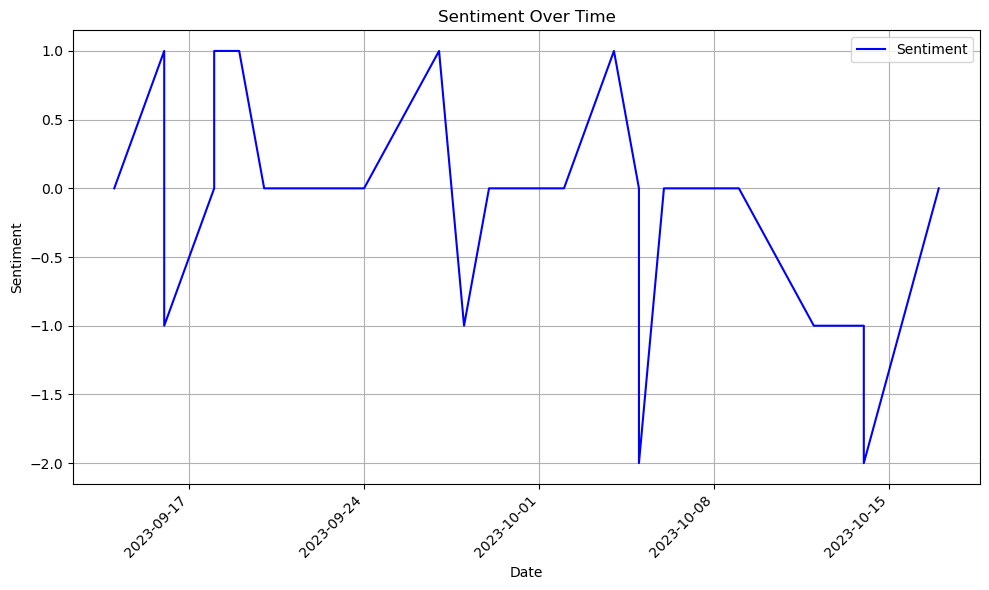

In [316]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

filtered_df = filtered_df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(filtered_df['date'], filtered_df['sentiment_title'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



In [ ]:
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

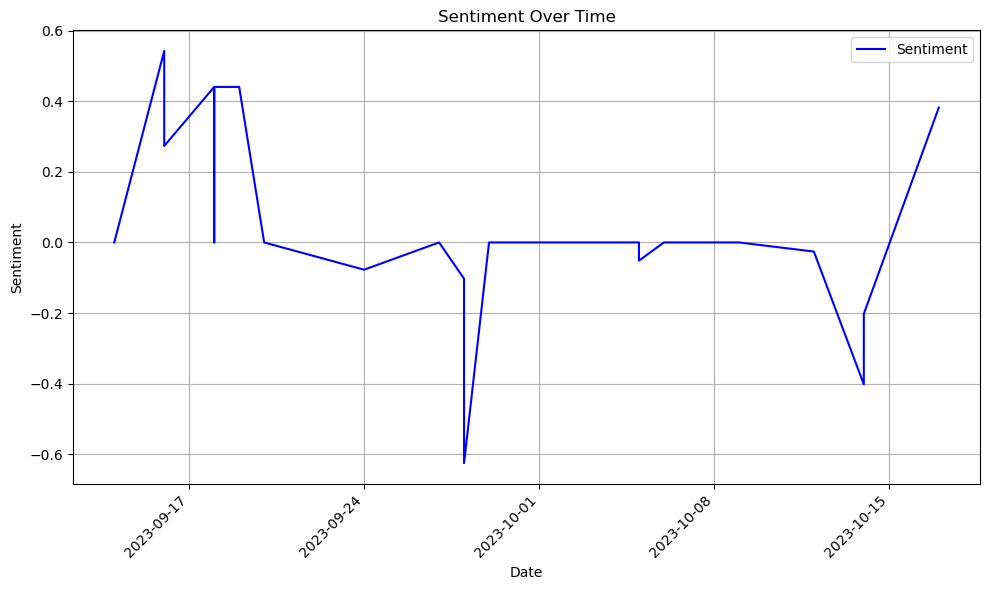

In [318]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

filtered_df = filtered_df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(filtered_df['date'], filtered_df['sentiment_title_vader'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Sentiment text cound and vader

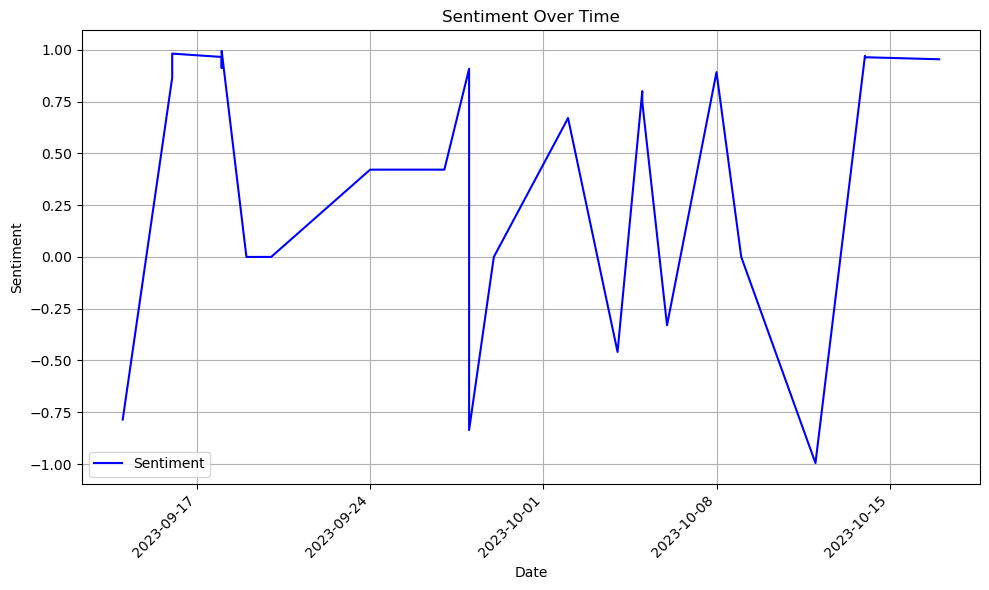

In [319]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

filtered_df = filtered_df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(filtered_df['date'], filtered_df['sentiment_text_vader'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


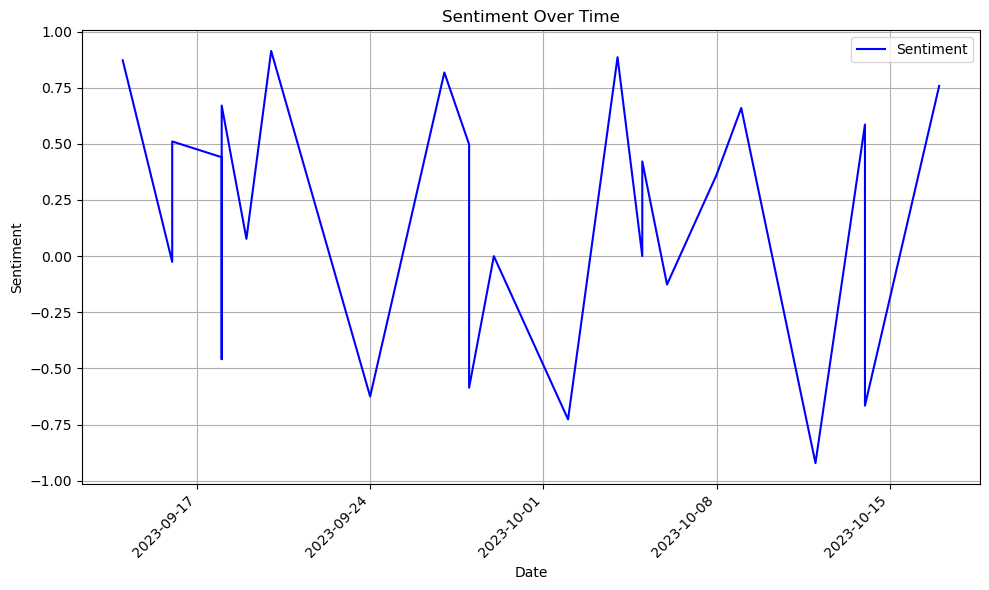

In [320]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

filtered_df = filtered_df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(filtered_df['date'], filtered_df['sentiment_comm_vader'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Wordcloud

In [181]:
import numpy as np
import math
def displayWordcloud(model, featureNames):

    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]    
    topicNum = len(model.components_)
    plotColNum = 3
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 

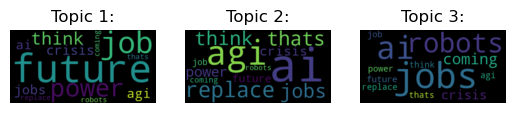

In [182]:
displayWordcloud(ldaModel, tfFeatureNames)

In [185]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2023-10-17 17:24:18 to 2023-09-14 22:03:30
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   title                            25 non-null     object        
 1   author                           25 non-null     object        
 2   score                            25 non-null     int64         
 3   Number of comments               25 non-null     int64         
 4   self text                        25 non-null     object        
 5   timestamp                        25 non-null     float64       
 6   upvoteratio                      25 non-null     float64       
 7   comments                         25 non-null     object        
 8   Title                            25 non-null     object        
 9   Self Text                        25 non-null     object        
 10  Top Comments              

### Subsetting posts(title) for each topic and finding the maximum sentiment

#### Topic 1

In [229]:
topic_1 = ['jobs','ai','replace']
mask = df['tokenized_title_no_stopwords'].apply(lambda x: any(keyword in x for keyword in topic_1))

In [230]:
mask

datetime
2023-10-17 12:17:59    False
2023-10-17 14:10:52    False
2023-10-17 18:53:13     True
2023-10-17 20:26:16    False
2023-10-17 20:43:13    False
                       ...  
2023-09-13 14:05:16    False
2023-09-14 03:05:27    False
2023-09-13 11:45:24    False
2023-09-13 15:21:53    False
2023-09-13 22:35:53    False
Name: tokenized_title_no_stopwords, Length: 503, dtype: bool

In [231]:
df_topic1 = df[mask]

In [232]:
df_topic1

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,...,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,combined_text,title_emotions
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-17 18:53:13,"Baidu released Ernie 4.0, CEO Robin Li claims ...",czk_21,64,20,,1.697569e+09,0.88,"didnt find any technical specification, just s...",baidu released ernie 40 ceo robin li claims th...,,...,[],"[didnt, find, any, technical, specification, ,...","[baidu, released, ernie, 40, ceo, robin, li, c...",[],"[didnt, find, technical, specification, showca...",2023-10-17,18:53:13,2023-10-17 18:53:13,NaN,"[anger, anger, anger, anger, anger, anger, ang..."
2023-10-17 20:41:34,[Paywall] OpenAI Dropped Work on New ‘Arrakis’...,eunumseioquescrever,30,16,,1.697575e+09,0.97,"From what I can read, it seems all OpenAI did ...",paywall openai dropped work on new arrakis ai ...,,...,[],"[from, what, i, can, read, ,, it, seems, all, ...","[paywall, openai, dropped, work, new, arrakis,...",[],"[read, seems, openai, scrap, *, launch, *, arr...",2023-10-17,20:41:34,2023-10-17 20:41:34,NaN,"[anger, anger, anger]"
2023-10-17 11:45:16,My AI Predictions 2023 - 2026,DukkyDrake,119,67,,1.697543e+09,0.90,I sooo craving for this kind of posts thank you,my ai predictions 2023 2026,,...,[],"[i, sooo, craving, for, this, kind, of, posts,...","[ai, predictions, 2023, 2026]",[],"[sooo, craving, kind, posts, thank]",2023-10-17,11:45:16,2023-10-17 11:45:16,NaN,[]
2023-10-17 01:33:19,"Seriously, what will happen when AI is good en...",raylolSW,278,270,Just downloaded TikTok and that thing is addic...,1.697506e+09,0.86,"Yes, our ASI overlords will finally be able to...",seriously what will happen when ai is good eno...,just downloaded tiktok and that thing is addic...,...,"[just, downloaded, tiktok, and, that, thing, i...","[yes, ,, our, asi, overlords, will, finally, b...","[seriously, happen, ai, good, enough, create, ...","[downloaded, tiktok, thing, addictive, imagine...","[yes, asi, overlords, finally, able, add, 3, m...",2023-10-17,01:33:19,2023-10-17 01:33:19,NaN,"[anger, anger, anger, anger, anger, anger, ang..."
2023-10-17 21:39:07,"Real-time AI Voices, try it now!",ninjasaid13,8,3,,1.697579e+09,0.91,I tried this AI voice thingy and it can genera...,realtime ai voices try it now,,...,[],"[i, tried, this, ai, voice, thingy, and, it, c...","[realtime, ai, voices, try]",[],"[tried, ai, voice, thingy, generate, text, spe...",2023-10-17,21:39:07,2023-10-17 21:39:07,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14 08:47:11,AI to strengthen Indian army with 4 legged rob...,Distinct-Question-16,203,146,"It's called MULE, and it's being showcased at ...",1.694681e+09,0.86,It's for low oxygen top mountains rough terrai...,ai to strengthen indian army with 4 legged rob...,its called mule and its being showcased at nor...,...,"[its, called, mule, and, its, being, showcased...","[it, 's, for, low, oxygen, top, mountains, rou...","[ai, strengthen, indian, army, 4, legged, robo...","[called, mule, showcased, north, tech, symposi...","['s, low, oxygen, top, mountains, rough, terra...",2023-09-14,08:47:11,2023-09-14 08:47:11,NaN,"[anger, anger, anger, anger, anger, anger, ang..."
2023-09-14 22:03:30,Ultimate Question (surrounding AI and Jobs),Serious-Cucumber-54,16,7,The ultimate question is whether AI will lower...,1.694729e+09,0.90,The COL 'should' near directly reduce in paral...,ultimate question surrounding ai and jobs,the ultimate question is whether ai will lower...,...,"[the, ultimate, question, is, whether, ai, wil...","[the, col, 'should, ', near, directly, reduce,...","[ultimate, question, surrounding, ai, jobs]","[ultimate, question, whether, ai, lower, cost,...","[col, 'should, near, directly, reduce, paralle...",2023-09-14,22:03:30,2023-09-14 22:03:30,Ultimate Question (surrounding AI and Jo

In [233]:
index = df_topic1['sentiment_title_vader'].idxmax()
print(df_topic1.loc[index]['title'],'\nSentiment:',df_topic1.loc[index]['sentiment_title_vader'])

KeyError: 'sentiment_title_vader'

In [233]:
index = df_topic1['sentiment_title_vader'].idxmin()
print(df_topic1.loc[index]['title'],'\nSentiment:',df_topic1.loc[index]['sentiment_title_vader'])

so what specifically is wrong with the methodology of hte 4 of scientists who deny anthropogenic climate change 
Sentiment: -0.6705


(array([19523., 19530., 19539., 19546., 19553., 19560., 19570., 19577.,
        19584., 19591.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

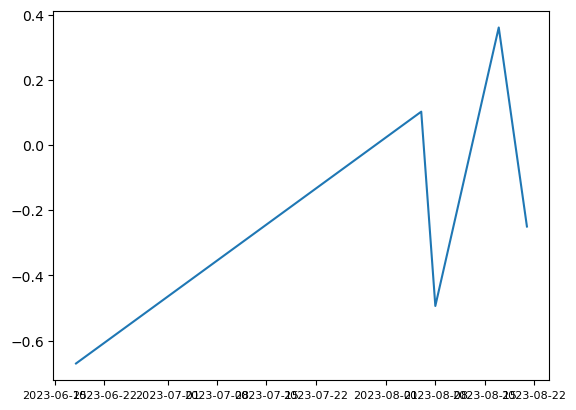

In [203]:
plt.plot(df_topic1['date'],df_topic1['sentiment_title_vader'])
plt.xticks(fontsize=8)

#### Topic 2

In [204]:
topic_2 = ['warming','global','new']
mask = df['tokenized_title_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_2))

In [205]:
df_topic2 = df[mask]

In [206]:
index = df_topic2['sentiment_title_vader'].idxmax()
df_topic2.loc[index]
print(df_topic2.loc[index]['title'],'\nSentiment:',df_topic2.loc[index]['sentiment_title_vader'])

new measurements suggest tropical cyclones may influence global climate  scripps researchers find that tropical cyclones cause deeper and longer lasting ocean warming than previously thought setting the stage for unexpected and far reaching implications 
Sentiment: 0.34


In [207]:
index = df_topic2['sentiment_title_vader'].idxmin()
df_topic2.loc[index]
print(df_topic2.loc[index]['title'],'\nSentiment:',df_topic2.loc[index]['sentiment_title_vader'])

global warming and its effect on the food we eat  nbc new york 
Sentiment: 0.1531


(array([19543., 19547., 19551., 19555., 19559., 19563., 19567.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

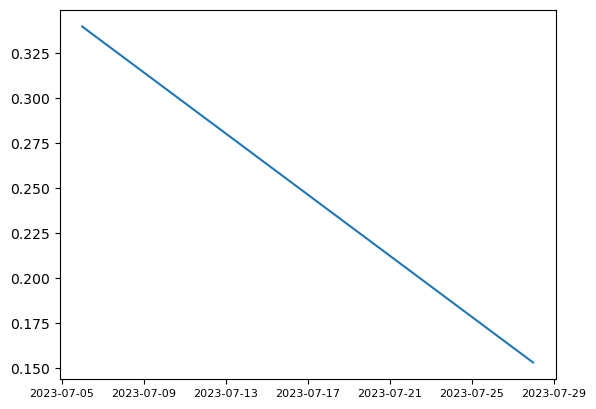

In [208]:
plt.plot(df_topic2['date'],df_topic2['sentiment_title_vader'])
plt.xticks(fontsize=8)

#### Topic 3

In [209]:
topic_3 = ['heat','extreme','ice']
mask = df['tokenized_title_no_stopwords'].apply(lambda x: any(keyword in x for keyword in topic_3))

In [210]:
df_topic3 = df[mask]

In [211]:
index = df_topic3['sentiment_title_vader'].idxmax()
df_topic3.loc[index]
print(df_topic3.loc[index]['title'],'\nSentiment:',df_topic3.loc[index]['sentiment_title_vader'])

video historic heat expected from gulf coast to great lakes tropical systems in atlantic 
Sentiment: 0.6249


In [212]:
index = df_topic3['sentiment_title_vader'].idxmin()
df_topic3.loc[index]
print(df_topic3.loc[index]['title'],'\nSentiment:',df_topic3.loc[index]['sentiment_title_vader'])

a war for water europe sounds the alarm on water stress ahead of another extreme summer 
Sentiment: -0.8442


(array([19509., 19523., 19539., 19553., 19570., 19584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

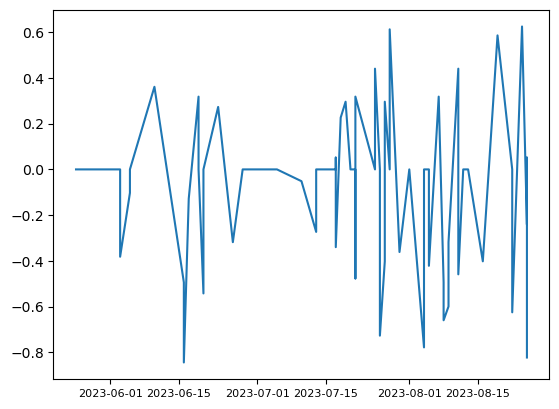

In [213]:
plt.plot(df_topic3['date'],df_topic3['sentiment_title_vader'])
plt.xticks(fontsize=8)

### Subsetting posts(content) for each topic and finding the maximum sentiment

#### Topic 1

In [214]:
topic_1 = ['climate', 'change', 'scientists']
mask = df['tokenized_text_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_1))
df_topic1 = df[mask]

In [215]:
index = df_topic1['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic1.loc[index]['title'],"\033[0m")
print(df_topic1.loc[index]['self text'],'\nSentiment:',df_topic1.loc[index]['sentiment_text_vader'])

 a lot of climate change skeptics these days as hyperbolic these days as actual climate alarmist 
and by climate alarmistsi dont mean people who soberly explain the real risks we are facing due to climate changei am talking about buffoons who think the world is ending because of it that having kids is immoral because of climate change or that basic shit needs to be banned 

but many climate skeptics have become their mirror image in terms of ridiculous hyperbole on some level they seem to get that outright denying climate change is just untenable but they constantly assert this false dichotomy to anyone who raises climate concerns with well i guess you just want to force everyone to deindustrialize and ruin the economy or make people in the third world starve or you wanna murder billions of people to reduce co2 or china and india pollute the most technically not true for india and the us is basically not polluting much at all or exaggerating how orthodox and unquestioning climate resea

In [216]:
index = df_topic1['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic1.loc[index]['title'],"\033[0m")
print(df_topic1.loc[index]['self text'],'\nSentiment:',df_topic1.loc[index]['sentiment_text_vader'])

 a lot of climate change skeptics these days as hyperbolic these days as actual climate alarmist 
and by climate alarmistsi dont mean people who soberly explain the real risks we are facing due to climate changei am talking about buffoons who think the world is ending because of it that having kids is immoral because of climate change or that basic shit needs to be banned 

but many climate skeptics have become their mirror image in terms of ridiculous hyperbole on some level they seem to get that outright denying climate change is just untenable but they constantly assert this false dichotomy to anyone who raises climate concerns with well i guess you just want to force everyone to deindustrialize and ruin the economy or make people in the third world starve or you wanna murder billions of people to reduce co2 or china and india pollute the most technically not true for india and the us is basically not polluting much at all or exaggerating how orthodox and unquestioning climate resea

(array([19509., 19523., 19539., 19553., 19570., 19584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

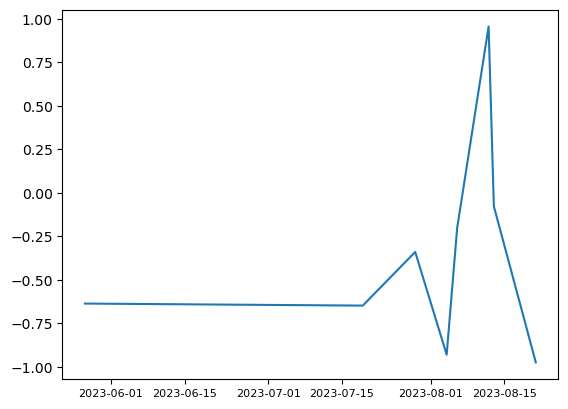

In [217]:
plt.plot(df_topic1['date'],df_topic1['sentiment_text_vader'])
plt.xticks(fontsize=8)

#### Topic 2

In [218]:
topic_2 = ['warming','global','new']
mask = df['tokenized_text_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_2))
df_topic2 = df[mask]

In [219]:
index = df_topic2['sentiment_text_vader'].idxmax()
print("\033[1m",df_topic2.loc[index]['title'],"\033[0m")
print(df_topic2.loc[index]['self text'],'\nSentiment:',df_topic2.loc[index]['sentiment_text_vader'])

 how to causally link weather events to increasing global average temps above baseline 
disclaimer i have been a skeptic for many years but i decided to actual dig into the scientific bases for global warming and climate change

i started with how global temperature is actually measured and compared over time its was easy to see that the global average temperature above baseline is increasing and that increase has accelerated since 2000 compelling cases were made that its was tied to industrialization and started at the industrial revolution

in graduate school i studied control theory and system dynamics you learn that everything has its own response time how long does it take something to react to a new stimulus so i asked myself how fast is the response time of the environment to pollution stimulus i read john stermans phd thesis feedback complexity in integrated climateeconomy models not a light read at all inspired by the world3 model he devised an economic model of the world coup

In [220]:
index = df_topic2['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic2.loc[index]['title'],"\033[0m")
print(df_topic2.loc[index]['self text'],'\nSentiment:',df_topic2.loc[index]['sentiment_text_vader'])

 after amoc shutdown  ifwhen it does 
there are dire warnings about amoc shutdown and of course there is the day after tomorrow which is probably at least an exaggerated timeline

but im having a different feeling at the moment and that is that when the existing amoc shuts down something else will start up  a new circulation pattern  my impression is that one of the specific fears is that melting of the greenland glaciers will reduce the density of the north atlantic and prevent those waters from falling as they have been  i dont know how troubled alaskan  siberian glaciers are and if that part of the circulation pattern is in imminent danger also

as a forinstance if the falling water around greenland shuts down and europe gets colder might the surface water begin falling closer to europe  the point is that if some other circulation pattern starts up it may become persistent and reversing global warming by whatever means may not bring things back to the way they were

has anyone studi

(array([19569., 19570., 19572., 19574., 19576., 19578.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

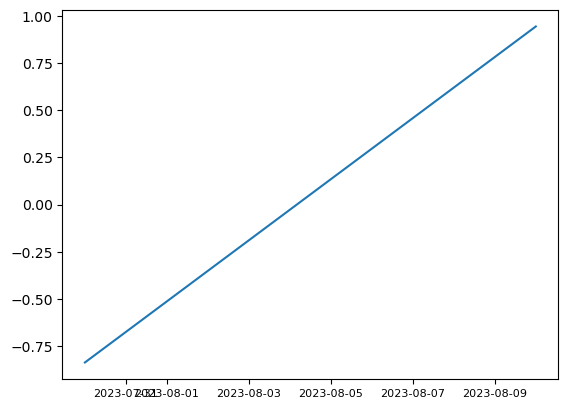

In [221]:
plt.plot(df_topic2['date'],df_topic2['sentiment_text_vader'])
plt.xticks(fontsize=8)

#### Topic 3

In [222]:
topic_3 = ['heat','extreme','ice']
mask = df['tokenized_text_no_stopwords'].apply(lambda x: any(keyword in x for keyword in topic_3))
df_topic3 = df[mask]

In [223]:
index = df_topic3['sentiment_text_vader'].idxmax()
print("\033[1m",df_topic3.loc[index]['title'],"\033[0m")
print(df_topic3.loc[index]['self text'],'\nSentiment:',df_topic3.loc[index]['sentiment_text_vader'])

 independent computer modeling 
hi all

im a chemical engineer very interested in making more impact than i already am im stamping engineer on a ev battery factory which is about as good as i can do as an individual would like to get some commercial or private equity loans to buy land and hire my ae firm or others to build a massive amount of solar in the us and abroad if anyone knows who to talk to reach out to me thanks 

i realize we cannot turn down fossil fuels until we have enough solar and batteries we are so close to the potential of making a huge difference i feel like the reasons we are not seeing progress we need is because old are too risk adverse to make the changes in rapid time 

i think sometimes people dont understand the severity of the problem the models are questioned too much seeding doubt  

what i would like to do it attempt to mathematically model basic heat transfer from the sun by latitude and add in atmospheric land and ocean temp gradients by latitude and se

In [224]:
index = df_topic3['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic3.loc[index]['title'],"\033[0m")
print(df_topic3.loc[index]['self text'],'\nSentiment:',df_topic3.loc[index]['sentiment_text_vader'])

 my mom disproved climate change and idk what to do 
i dont remember every record she recited for me but basically heatwaves have been occurring for centuries the medieval warm period happened and now were coming out of the little ice age there were cases of heatwaves over 110 in the us northeast back in the 1800s and our record temps are the norm around the equator its called summer what are they gonna say when winter happens the whole climate change nonsense only happened when they found out that global warming is nonsense 

not one real scientist believes in it no meteorologist ever mentions it nobody can hand you statistics and scientific data to demonstrate proof of change 

moreso we have been here too briefly for climate change to be a measure of centuries of temps its virtually impossible for humans to affect the climate were too small and have been here too briefly

natgeo has had to retract a story about a polar bear dying because of climate change it actually had cancer they

(array([19509., 19523., 19539., 19553., 19570., 19584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

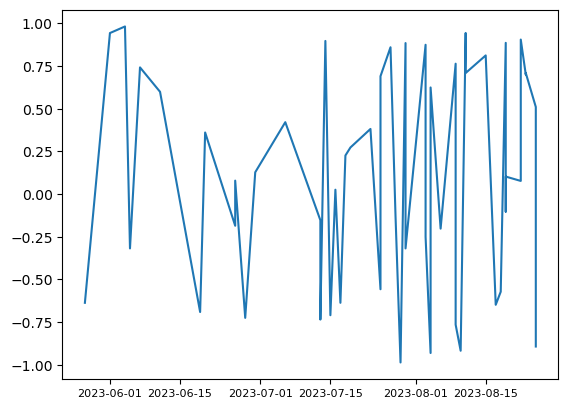

In [225]:
plt.plot(df_topic3['date'],df_topic3['sentiment_text_vader'])
plt.xticks(fontsize=8)

### Bi-grams

#### With tokenized title

In [235]:
from nltk import ngrams
from collections import Counter
all_tokens=[]
df['tokenized_title_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-10-17 12:17:59    None
2023-10-17 14:10:52    None
2023-10-17 18:53:13    None
2023-10-17 20:26:16    None
2023-10-17 20:43:13    None
                       ... 
2023-09-13 14:05:16    None
2023-09-14 03:05:27    None
2023-09-13 11:45:24    None
2023-09-13 15:21:53    None
2023-09-13 22:35:53    None
Name: tokenized_title_no_stopwords, Length: 503, dtype: object

In [236]:
bigrams = [list(ngrams(tokens, 2)) for tokens in all_tokens]
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counter = Counter(flat_bigrams)
top_n = 10
top_bigrams = bigram_counter.most_common(top_n)


In [237]:
top_bigrams


[(('language', 'models'), 14),
 (('artificial', 'intelligence'), 12),
 (('dalle', '3'), 11),
 (('large', 'language'), 8),
 (('jimmy', 'apples'), 7),
 (('generative', 'ai'), 6),
 (('sam', 'altman'), 6),
 (('ai', 'model'), 5),
 (('agi', 'achieved'), 5),
 (('language', 'model'), 4)]

#### With tokenized text 

In [238]:
all_tokens=[]
df['tokenized_text_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-10-17 12:17:59    None
2023-10-17 14:10:52    None
2023-10-17 18:53:13    None
2023-10-17 20:26:16    None
2023-10-17 20:43:13    None
                       ... 
2023-09-13 14:05:16    None
2023-09-14 03:05:27    None
2023-09-13 11:45:24    None
2023-09-13 15:21:53    None
2023-09-13 22:35:53    None
Name: tokenized_text_no_stopwords, Length: 503, dtype: object

In [239]:
bigrams = [list(ngrams(tokens, 2)) for tokens in all_tokens]
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counter = Counter(flat_bigrams)
top_n = 30
top_bigrams = bigram_counter.most_common(top_n)


In [240]:
top_bigrams

[(('seems', 'like'), 12),
 (('language', 'models'), 12),
 (('dont', 'know'), 11),
 (('large', 'language'), 11),
 (('dalle', '3'), 11),
 (('something', 'like'), 10),
 (('feel', 'like'), 10),
 (('ai', 'models'), 8),
 (('years', 'ago'), 8),
 (('dont', 'think'), 8),
 (('would', 'like'), 8),
 (('lets', 'say'), 8),
 (('ai', 'agents'), 8),
 (('ai', 'could'), 8),
 (('jimmy', 'apples'), 7),
 (('artificial', 'intelligence'), 7),
 (('agi', 'would'), 7),
 (('training', 'data'), 7),
 (('ai', 'systems'), 7),
 (('general', 'intelligence'), 7),
 (('people', 'dont'), 7),
 (('ai', 'would'), 7),
 (('gon', 'na'), 7),
 (('technological', 'singularity'), 6),
 (('human', 'intelligence'), 6),
 (('models', 'llms'), 6),
 (('ai', 'might'), 6),
 (('agi', 'asi'), 6),
 (('2', 'times'), 6),
 (('people', 'think'), 6)]

### Unigram

#### With tokenized title

In [241]:
all_tokens=[]
df['tokenized_title_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-10-17 12:17:59    None
2023-10-17 14:10:52    None
2023-10-17 18:53:13    None
2023-10-17 20:26:16    None
2023-10-17 20:43:13    None
                       ... 
2023-09-13 14:05:16    None
2023-09-14 03:05:27    None
2023-09-13 11:45:24    None
2023-09-13 15:21:53    None
2023-09-13 22:35:53    None
Name: tokenized_title_no_stopwords, Length: 503, dtype: object

In [242]:
unigrams = [list(ngrams(tokens, 1)) for tokens in all_tokens]
flat_unigrams = [unigram for sublist in unigrams for unigram in sublist]
unigram_counter = Counter(flat_unigrams)
top_n = 10
top_unigrams = unigram_counter.most_common(top_n)
top_unigrams

[(('ai',), 154),
 (('new',), 42),
 (('agi',), 41),
 (('think',), 32),
 (('model',), 30),
 (('language',), 25),
 (('openai',), 24),
 (('models',), 24),
 (('intelligence',), 23),
 (('gpt4',), 17)]

#### With tokenized text

In [243]:
all_tokens=[]
df['tokenized_text_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-10-17 12:17:59    None
2023-10-17 14:10:52    None
2023-10-17 18:53:13    None
2023-10-17 20:26:16    None
2023-10-17 20:43:13    None
                       ... 
2023-09-13 14:05:16    None
2023-09-14 03:05:27    None
2023-09-13 11:45:24    None
2023-09-13 15:21:53    None
2023-09-13 22:35:53    None
Name: tokenized_text_no_stopwords, Length: 503, dtype: object

In [244]:
unigrams = [list(ngrams(tokens, 1)) for tokens in all_tokens]
flat_unigrams = [unigram for sublist in unigrams for unigram in sublist]
unigram_counter = Counter(flat_unigrams)
top_n = 30
top_unigrams = unigram_counter.most_common(top_n)
top_unigrams

[(('ai',), 283),
 (('would',), 238),
 (('like',), 162),
 (('could',), 121),
 (('people',), 119),
 (('even',), 111),
 (('think',), 103),
 (('time',), 95),
 (('agi',), 94),
 (('human',), 90),
 (('also',), 83),
 (('model',), 83),
 (('models',), 81),
 (('know',), 77),
 (('one',), 77),
 (('world',), 70),
 (('dont',), 69),
 (('way',), 65),
 (('im',), 65),
 (('make',), 64),
 (('new',), 63),
 (('much',), 59),
 (('able',), 59),
 (('see',), 58),
 (('future',), 57),
 (('want',), 55),
 (('us',), 55),
 (('intelligence',), 53),
 (('really',), 53),
 (('years',), 52)]

In [194]:

subreddit = client.subreddit(sSubredditName)
top_post = subreddit.top(limit=1)  # You can change the time_filter if needed


# Print the comments
for post in top_post:
    # Retrieve the post's comments
    comments = post.comments

    # Print the comments
    for comment in comments:
        print(comment.body)

> Feeling scared? Have you been listening to or reading sources that make you think climate change will kill:
>
>
>- you?
>- your friends and family?
>- all of humanity?
>
>
>You aren't the only one.

Infomercial vibes.
So I know this is a late response to this thread but I hope some people see this.

&#x200B;

Reddit is for the most part not a great place for non-bias sources, as you can probably tell it is VERY bias towards a democrat viewpoint. Which I believe for the most part, is actually very logical. Most of the general viewpoints are realistic and good, but the specific information written in a headline as a hyperbole because of the bias. Imo this is actually pretty good, especially because it's scientifically backed. Because of this it makes people who were on the fence (much like myself and many others I know) about voting much clearer. But because of this going to Reddit for world news (specifically climate change) is the equivalent of using WebMD to diagnose yourself. There

In [ ]:
##################################################################################################################################

In [190]:
filtered_df

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,Title,Self Text,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime
datetime,,,,,,,,,,,,,,,,,,,,
2023-10-17 17:24:18,Techno-Optimist Manifesto: Infinite job growth,riceandcashews,28,37,I read the manifesto and I mostly am sympathet...,1.697563e+09,0.79,Good jobs are going to continue to shrink. For...,technooptimist manifesto infinite job growth,i read the manifesto and i mostly am sympathet...,good jobs are going to continue to shrink. for...,"[technooptimist, manifesto, infinite, job, gro...","[i, read, the, manifesto, and, i, mostly, am, ...","[good, jobs, are, going, to, continue, to, shr...","[technooptimist, manifesto, infinite, job, gro...","[read, manifesto, mostly, sympathetic, suspect...","[good, jobs, going, continue, shrink, 100, peo...",2023-10-17,17:24:18,2023-10-17 17:24:18
2023-10-14 12:56:24,How strange is it to think how AGI will change...,_Un_Known__,77,53,"For most of my life, I've always aspired to do...",1.697288e+09,0.86,"It's not strange at all to wonder, but timelin...",how strange is it to think how agi will change...,for most of my life ive always aspired to do t...,"it's not strange at all to wonder, but timelin...","[how, strange, is, it, to, think, how, agi, wi...","[for, most, of, my, life, ive, always, aspired...","[it, 's, not, strange, at, all, to, wonder, ,,...","[strange, think, agi, change, course, future]","[life, ive, always, aspired, best, plan, futur...","['s, strange, wonder, timelines, unknown, agi,...",2023-10-14,12:56:24,2023-10-14 12:56:24
2023-10-14 13:28:47,For Those Expecting a Jobless Utopia : How wil...,BigZaddyZ3,0,171,Picture this : AGI has eliminated the last rem...,1.697290e+09,0.41,Why are you assuming the supply wouldn't expan...,for those expecting a jobless utopia how will...,picture this agi has eliminated the last rema...,why are you assuming the supply wouldn't expan...,"[for, those, expecting, a, jobless, utopia, ho...","[picture, this, agi, has, eliminated, the, las...","[why, are, you, assuming, the, supply, would, ...","[expecting, jobless, utopia, deal, coming, vac...","[picture, agi, eliminated, last, remaining, jo...","[assuming, supply, would, n't, expand, meet, d...",2023-10-14,13:28:47,2023-10-14 13:28:47
2023-10-12 11:41:56,What are these supposed “Risks” created by AI ...,BigZaddyZ3,9,73,This question is really more of a continuation...,1.697111e+09,0.62,The primary risk is caused by a symphony of er...,what are these supposed risks created by ai re...,this question is really more of a continuation...,the primary risk is caused by a symphony of er...,"[what, are, these, supposed, risks, created, b...","[this, question, is, really, more, of, a, cont...","[the, primary, risk, is, caused, by, a, sympho...","[supposed, risks, created, ai, regulationcentr...","[question, really, continuation, conversation,...","[primary, risk, caused, symphony, errors, focu...",2023-10-12,11:41:56,2023-10-12 11:41:56
2023-10-09 16:06:02,AI is replacing customer service jobs across t...,SharpCartographer831,486,242,,1.696868e+09,0.97,I hope I never have to work a customer service...,ai is replacing customer service jobs across t...,,i hope i never have to work a customer service...,"[ai, is, replacing, customer, service, jobs, a...",[],"[i, hope, i, never, have, to, work, a, custome...","[ai, replacing, customer, service, jobs, acros...",[],"[hope, never, work, customer, service, job, li...",2023-10-09,16:06:02,2023-10-09 16:06:02
2023-10-08 13:24:02,Just to give a basic example of how cheap AI r...,cloudrunner69,290,410,"Ok, so Spot the robot dog was released about t...",1.696771e+09,0.90,It will eventually be cheaper to buy a robot t...,just to give a basic example of how cheap ai r...,ok so spot the robot dog was released about th...,it will eventually be cheaper to buy a robot 

In [191]:
filepath='NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt'
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df.head(12)

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [192]:
emolex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141820 entries, 0 to 141819
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   word         141820 non-null  object
 1   emotion      141820 non-null  object
 2   association  141820 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [217]:
def lookup_emotions(word_list):
    emotions = []
    for word in word_list:
        word_row = emolex_df[(emolex_df['word'] == word) & (emolex_df['association'] == 1)]
        if not word_row.empty:
            emotion = word_row.iloc[0]['emotion']
            emotions.append(emotion)
    return emotions

In [220]:
filtered_df['title_emotions'] = filtered_df['tokenized_title_no_stopwords'].apply(lookup_emotions)
filtered_df['self_text_emotions'] = filtered_df['tokenized_text_no_stopwords'].apply(lookup_emotions)
filtered_df['comments_emotions'] = filtered_df['tokenized_comments_no_stopwords'].apply(lookup_emotions)

In [221]:
filtered_df['title_emotions']

datetime
2023-10-17 17:24:18                       [positive, positive, positive]
2023-10-14 12:56:24                                               [fear]
2023-10-14 13:28:47    [anticipation, anticipation, anticipation, neg...
2023-10-12 11:41:56                                                   []
2023-10-09 16:06:02                                           [positive]
2023-10-08 13:24:02                                           [negative]
2023-10-06 19:14:09                                              [anger]
2023-10-05 07:51:18         [negative, positive, negative, anticipation]
2023-10-05 03:11:12                                                   []
2023-10-04 05:49:09                                                   []
2023-10-02 13:55:40                                                   []
2023-09-29 02:29:55                                           [positive]
2023-09-28 14:57:34                                           [negative]
2023-09-28 15:25:22               [positiv

In [222]:
filtered_df['comments_emotions']

datetime
2023-10-17 17:24:18                   [anticipation, anticipation, fear]
2023-10-14 12:56:24    [anticipation, anticipation, anticipation, fea...
2023-10-14 13:28:47                                      [positive, joy]
2023-10-12 11:41:56    [positive, anticipation, anticipation, anticip...
2023-10-09 16:06:02    [anticipation, positive, positive, anticipatio...
2023-10-08 13:24:02                        [anticipation, joy, positive]
2023-10-06 19:14:09    [anticipation, joy, positive, positive, positi...
2023-10-05 07:51:18     [anger, negative, fear, joy, fear, trust, anger]
2023-10-05 03:11:12                                       [anticipation]
2023-10-04 05:49:09    [anticipation, disgust, anticipation, trust, p...
2023-10-02 13:55:40    [positive, surprise, positive, negative, posit...
2023-09-29 02:29:55                                                   []
2023-09-28 14:57:34    [anger, joy, anger, anger, anger, anger, posit...
2023-09-28 15:25:22    [anticipation, anti

In [223]:
filtered_df['self_text_emotions']

datetime
2023-10-17 17:24:18    [fear, fear, positive, positive, positive, pos...
2023-10-14 12:56:24    [anticipation, positive, anticipation, negativ...
2023-10-14 13:28:47    [trust, anticipation, anticipation, anticipati...
2023-10-12 11:41:56    [positive, anticipation, positive, anger, trus...
2023-10-09 16:06:02                                                   []
2023-10-08 13:24:02    [positive, fear, anticipation, anticipation, a...
2023-10-06 19:14:09    [fear, trust, positive, surprise, anticipation...
2023-10-05 07:51:18    [negative, anticipation, positive, fear, antic...
2023-10-05 03:11:12    [disgust, positive, anger, positive, positive,...
2023-10-04 05:49:09    [anticipation, positive, anticipation, positiv...
2023-10-02 13:55:40               [anticipation, surprise, anticipation]
2023-09-29 02:29:55                                                   []
2023-09-28 14:57:34    [anticipation, anger, negative, positive, anti...
2023-09-28 15:25:22    [fear, positive, jo

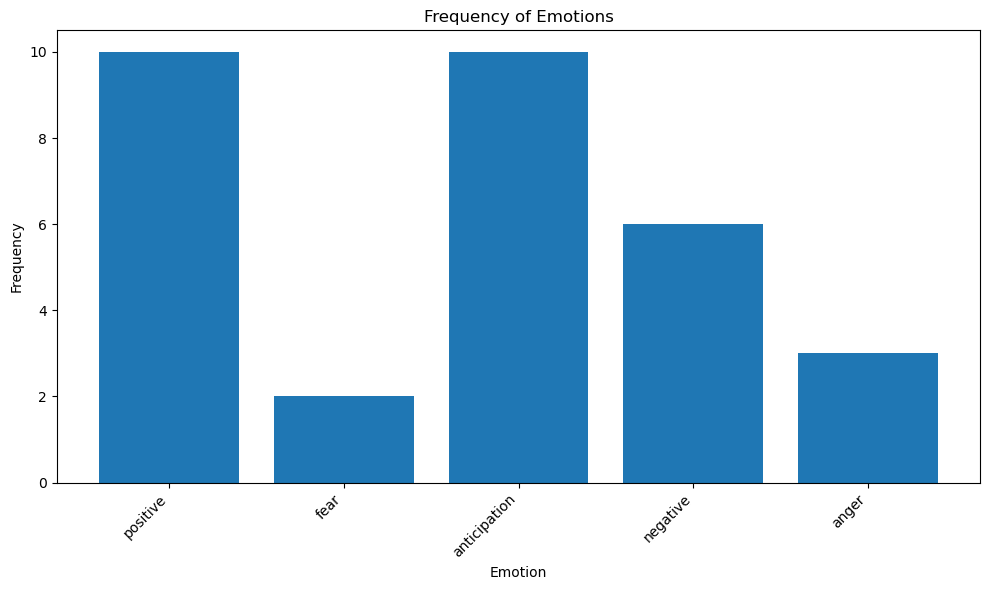

In [228]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'emotions' is a column containing lists of emotions
all_emotions = [emotion for emotions_list in filtered_df['title_emotions'] for emotion in emotions_list]
emotion_counts = Counter(all_emotions)

emotions, counts = zip(*emotion_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(emotions, counts)
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Emotions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\ANJANA\anaconda3\lib\site-packages

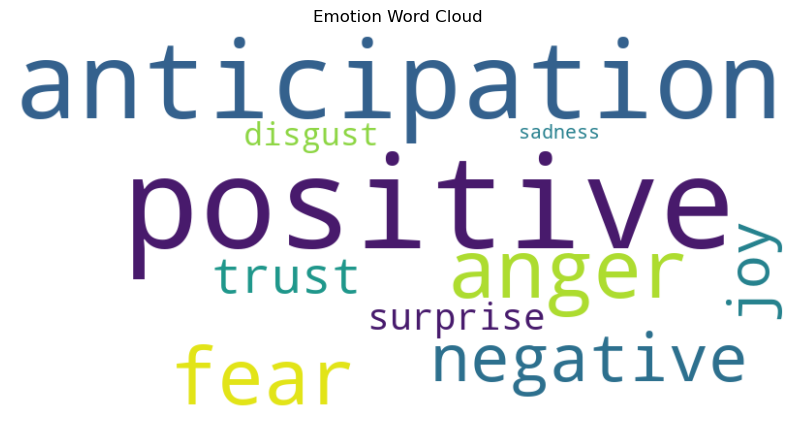

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'emotions' is a column containing lists of emotions
all_emotions = [emotion for emotions_list in filtered_df['self_text_emotions'] for emotion in emotions_list]
emotion_counts = Counter(all_emotions)

# Generate a word cloud from the emotion counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Emotion Word Cloud')
plt.show()


In [227]:
import plotly.express as px
from collections import Counter

# Assuming 'emotions' is a column containing lists of emotions
all_emotions = [emotion for emotions_list in filtered_df['comments_emotions'] for emotion in emotions_list]
emotion_counts = Counter(all_emotions)

# Create a DataFrame from emotion counts
import pandas as pd
emotion_df = pd.DataFrame(emotion_counts.items(), columns=['Emotion', 'Count'])

# Create a sunburst chart
fig = px.sunburst(
    emotion_df,
    path=['Emotion'],
    values='Count',
    color='Count',
    color_continuous_scale='Viridis',
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


C:\Users\ANJANA\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ANJANA\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

